## Importing the necessary libraries for preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, power_transform
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings('ignore')

## Reading the dataset for powerplants in India

In [2]:
data = pd.read_csv(r'C:\Users\LENOVO\Documents\Post Graduation\data sets\global-power-plant-database-master\global-power-plant-database-master\source_databases_csv\database_IND.csv')
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


## the data currently has 25 features and 908 rows

In [3]:
data.shape

(908, 25)

### Checking for Null Values

In [4]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

### Upon reviewing, we can see that the features like 'other_fuel1', 'other_fuel2', 'other_fuel3',  'wepp_id', 'estimated_generation_gwh' has more than 80% nullvalues and the column 'owner' is unique for each row, 'country_long', 'country' is same for all rows and these column will not help us in analysing the capacity and fuel type. Therefore dropping the same

In [5]:
data = data.drop(columns = ['other_fuel1','other_fuel2','other_fuel3','owner','country_long','country','wepp_id',
                           'estimated_generation_gwh'])

### Checking for null values again

In [6]:
data.isnull().sum()

name                        0
gppd_idnr                   0
capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
source                      0
url                         0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

### I can see that there are more than 50% null values in some variables. However it is useful in prediction therefore proceeding with the imputation

## Checking for data types

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 17 columns):
name                      908 non-null object
gppd_idnr                 908 non-null object
capacity_mw               908 non-null float64
latitude                  862 non-null float64
longitude                 862 non-null float64
primary_fuel              908 non-null object
commissioning_year        528 non-null float64
source                    908 non-null object
url                       908 non-null object
geolocation_source        889 non-null object
year_of_capacity_data     520 non-null float64
generation_gwh_2013       384 non-null float64
generation_gwh_2014       401 non-null float64
generation_gwh_2015       425 non-null float64
generation_gwh_2016       437 non-null float64
generation_gwh_2017       443 non-null float64
generation_data_source    450 non-null object
dtypes: float64(10), object(7)
memory usage: 120.7+ KB


### Upon reviewing the features again, I can see that the features like name and url is unique for every row and cannot be used for prediction, hence  dropping them too

In [8]:
data['name'].unique()

array(['ACME Solar Tower', 'ADITYA CEMENT WORKS',
       'AES Saurashtra Windfarms', 'AGARTALA GT', 'AKALTARA TPP',
       'AKRIMOTA LIG', 'ALIYAR', 'ALLAIN DUHANGAN', 'ALMATTI DAM',
       'AMAR KANTAK', 'AMARAVATI TPP', 'ANANDPUR SAHIB ST-I&II',
       'ANAPARA "C"', 'ANDHRA', 'ANOOPGARH ST I&II', 'ANPARA', 'ANTA GT',
       'ANUPPUR', 'ANUPUR TPP', 'ARVINDNAGAR SUGAR', 'ASHOKNAGAR MILL',
       'ATHANI SUGAR', 'AURAIYA GT', 'AVANTHA BHANDAR TPP',
       'AWARPUR CEMENT PLANT', 'Abhijeet', 'Amarsar Solar Power Plant',
       'Anabura Wind Farm', 'Ananthapur - Meil Solar Power Plant',
       'Andrha Lake Wind Farm', 'Anikkadavu Wind Farm',
       'Arasinagundi Wind Farm', 'Askandra - DREPL Solar Power Plant',
       'Askandra - Electromech Maritech Solar Power Plant',
       'Askandra - Finehope Solar Power Plant',
       'Askandra - Khaya Solar Power Plant',
       'Askandra - Newton Solar Power Plant',
       'Askandra - Saidham Solar Power Plant',
       'Askandra - Vasavi Solar Po

In [9]:
data = data.drop(columns = ['name','url'])

### Viewing the data post removal of irrelavant columns for prediction

In [10]:
data.head()

,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority
4,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority


### Here I can still see that the column gppd_idnr is also unique for every row. Therefore dropping that column too

In [11]:
data = data.drop(columns = 'gppd_idnr')

### Checking for null values again

In [12]:
data.isnull().sum()

capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2013       524
generation_gwh_2014       507
generation_gwh_2015       483
generation_gwh_2016       471
generation_gwh_2017       465
generation_data_source    458
dtype: int64

### Due to more number of null values, i'm using iterative imputer on continuous columns like generation_gwh with respect to capacity_mw

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [14]:
imputer = IterativeImputer()
data[['capacity_mw','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']] = imputer.fit_transform(data[['capacity_mw','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']])

In [15]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,NaN,1557.655244,1520.518682,1368.018925,1024.865738,747.136747,NaN
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI,NaN,1633.997124,1635.271802,1518.361243,1240.587708,1021.326376,NaN
2,39.2,21.9038,69.3732,Wind,NaN,CDM,WRI,NaN,1586.992909,1564.617525,1425.794455,1107.766222,852.505955,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority


### using label encoder to encode only the primay_fuel because its a class and it has to be predicted in this problem statement

In [16]:
le = LabelEncoder()
data['primary_fuel'] = le.fit_transform(data['primary_fuel'])

### using the iterative imputer to impute the categorical data with respect to primary fuel. I'm using the iterative imputer again because there is a lot of data missing and it would be better to fill them with prediction

In [17]:
cat_impute = IterativeImputer(initial_strategy = 'most_frequent')
data[['primary_fuel','commissioning_year','year_of_capacity_data']] = cat_impute.fit_transform(data[['primary_fuel','commissioning_year','year_of_capacity_data']])

In [18]:
data[['commissioning_year','year_of_capacity_data']] = round(data[['commissioning_year','year_of_capacity_data']],0)

### For other categorical data, I'm filling the na with fillna method with mode of the data

In [19]:
data['geolocation_source'] = data['geolocation_source'].fillna(data['geolocation_source'].mode()[0])

In [20]:
data['generation_data_source'] = data['generation_data_source'].fillna(data['generation_data_source'].mode()[0])

### Again replacing the missing latitude and longitude information with a iterative imputer to get approximate location.

In [21]:
data[['capacity_mw','latitude','longitude']] = imputer.fit_transform(data[['capacity_mw','latitude','longitude']])

## let's see the data now

In [22]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
0,2.5,28.1839,73.2407,6.0,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory,2018.0,1557.655244,1520.518682,1368.018925,1024.865738,747.136747,Central Electricity Authority
1,98.0,24.7663,74.6090,1.0,2003.0,Ultratech Cement ltd,WRI,2018.0,1633.997124,1635.271802,1518.361243,1240.587708,1021.326376,Central Electricity Authority
2,39.2,21.9038,69.3732,7.0,1974.0,CDM,WRI,2018.0,1586.992909,1564.617525,1425.794455,1107.766222,852.505955,Central Electricity Authority
3,135.0,23.8712,91.3602,2.0,2004.0,Central Electricity Authority,WRI,2018.0,631.777928,617.789264,843.747000,886.004428,663.774500,Central Electricity Authority
4,1800.0,21.9603,82.4091,1.0,2015.0,Central Electricity Authority,WRI,2018.0,1668.290000,3035.550000,5916.370000,6243.000000,5385.579736,Central Electricity Authority


### Before we encode other data, let's visualize the relationship of the dependent and independent variables

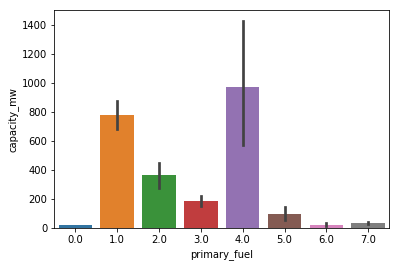

In [23]:
sns.barplot(y = 'capacity_mw',x = 'primary_fuel', data = data)

### Upon reviewing, we can see that the fuel with label 4 has higest capacity and the fuel with label 0 and 6 being the lowest capacity plants

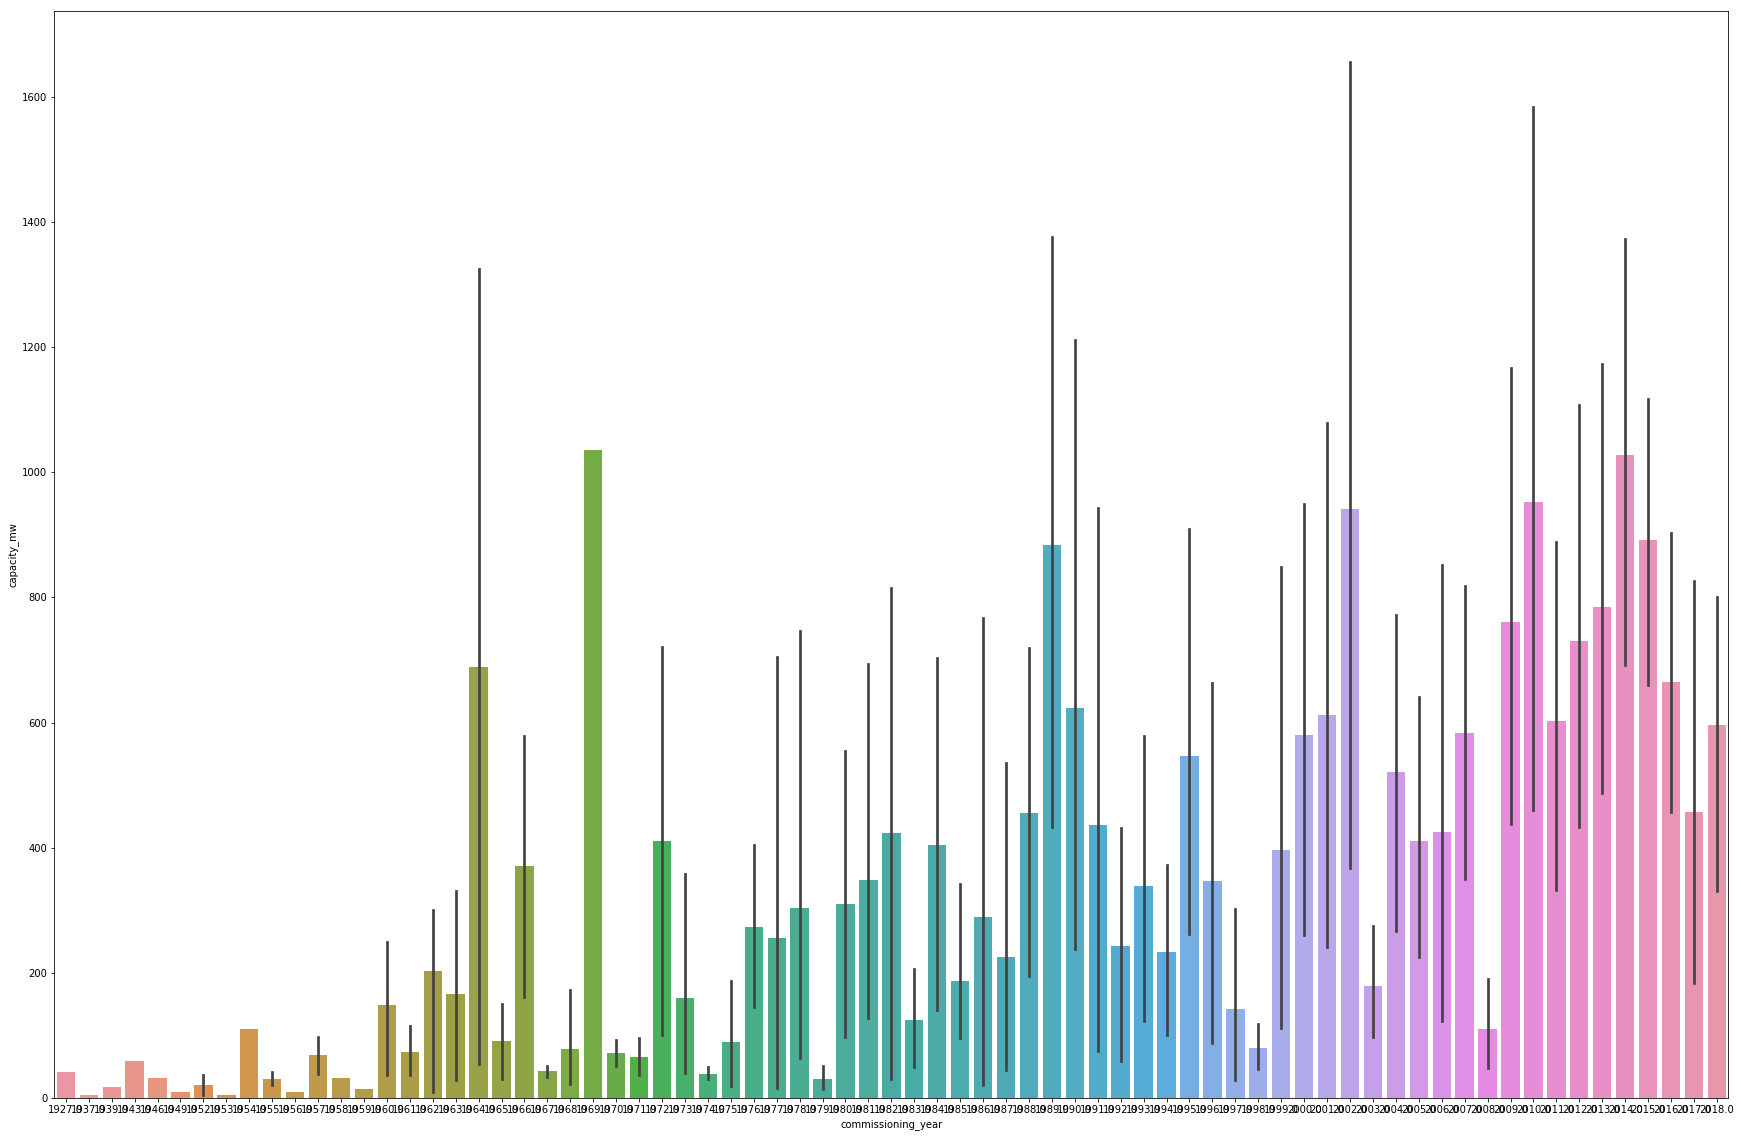

In [24]:
plt.figure(figsize = (30,20))
sns.barplot(y = 'capacity_mw',x = 'commissioning_year', data = data)

### There is a gradual increase in capacity as the year increases, although I'm seeing some downs inbetween, I can see overall increase in capacity of the power plants

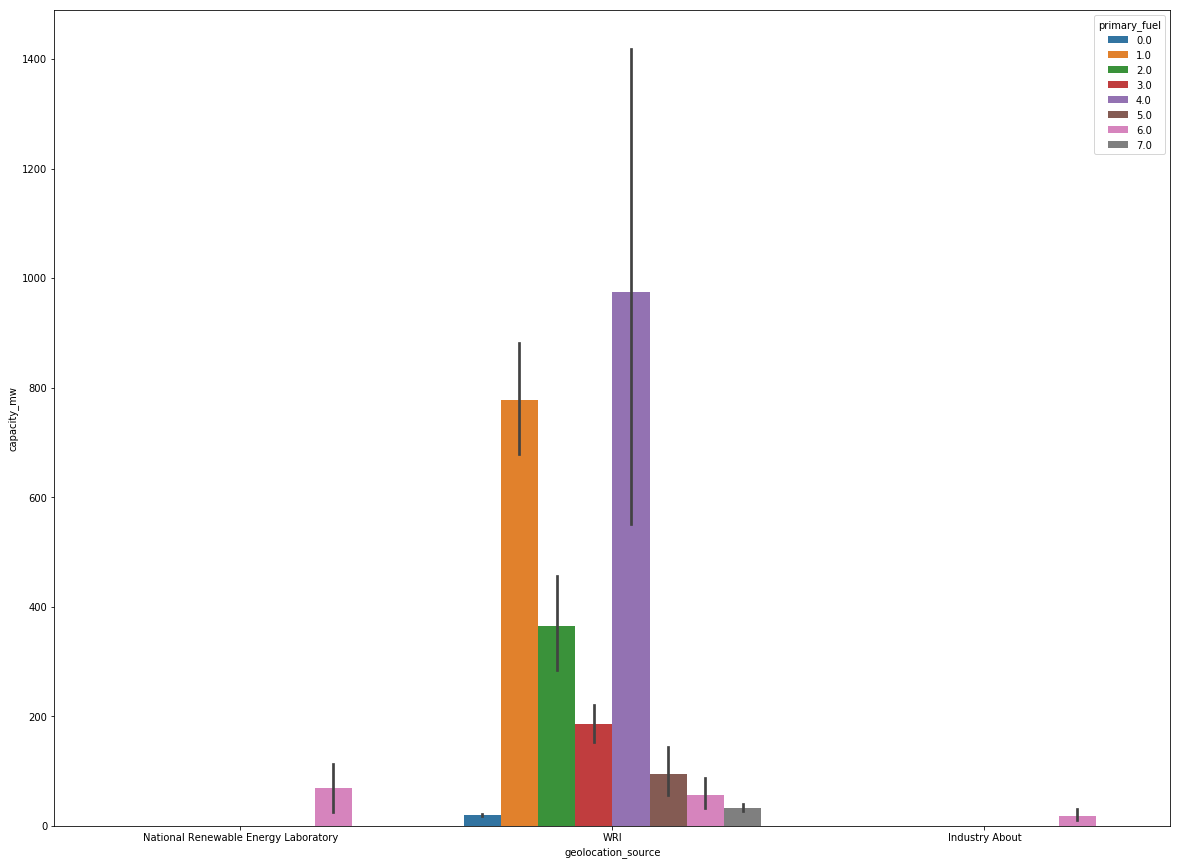

In [25]:
plt.figure(figsize = (20,15))
sns.barplot(y = 'capacity_mw',x = 'geolocation_source', data = data, hue = 'primary_fuel')

### I can see that WRi geo location source has all types of power generation plants information

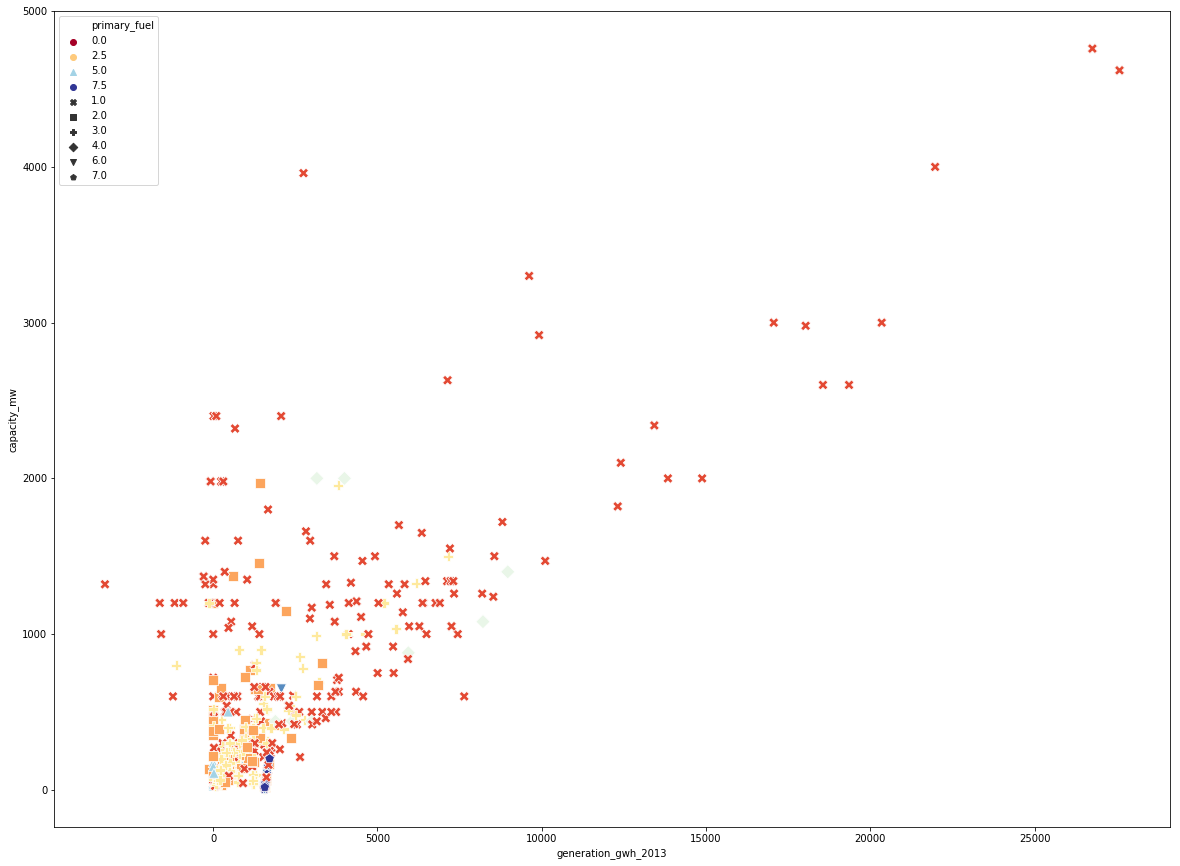

In [26]:
plt.figure(figsize = (20,15))
sns.scatterplot(y = 'capacity_mw',x = 'generation_gwh_2013', data = data, hue = 'primary_fuel', style='primary_fuel', palette='RdYlBu', s =100 )

### The above figure shows the relation between the powerplant capacity and their production in the year 2013 and we can see a linear relation, i.e., higher the capacity, higher the power generation. I can see that using the fuel type 1  they produced higher quantity of electricity, the 2nd highest was fuel type 2

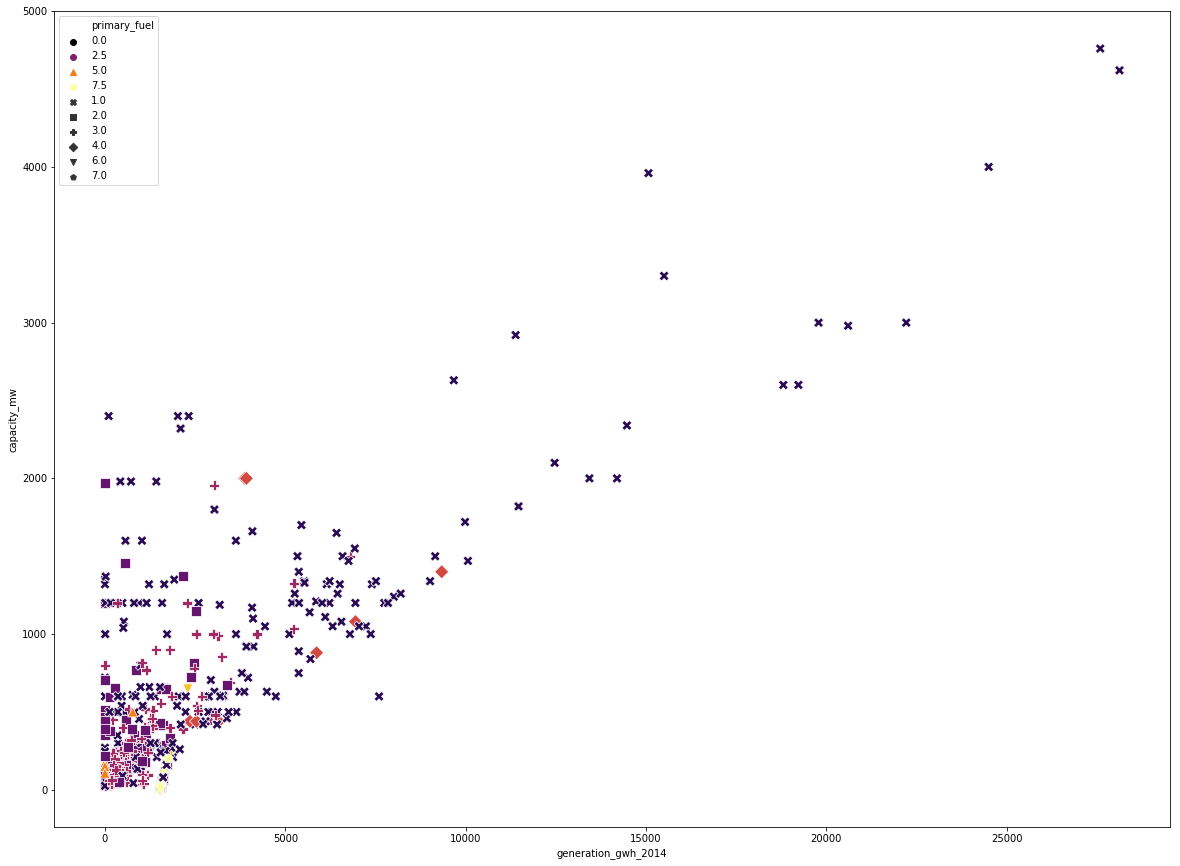

In [27]:
plt.figure(figsize = (20,15))
sns.scatterplot(y = 'capacity_mw',x = 'generation_gwh_2014', data = data, hue = 'primary_fuel', style='primary_fuel', palette='inferno', s =100 )

### The trend is almost the same as the year 2013, for all the other years, however we can see a gradual increase in the capacity for few plants using the fuel type 4

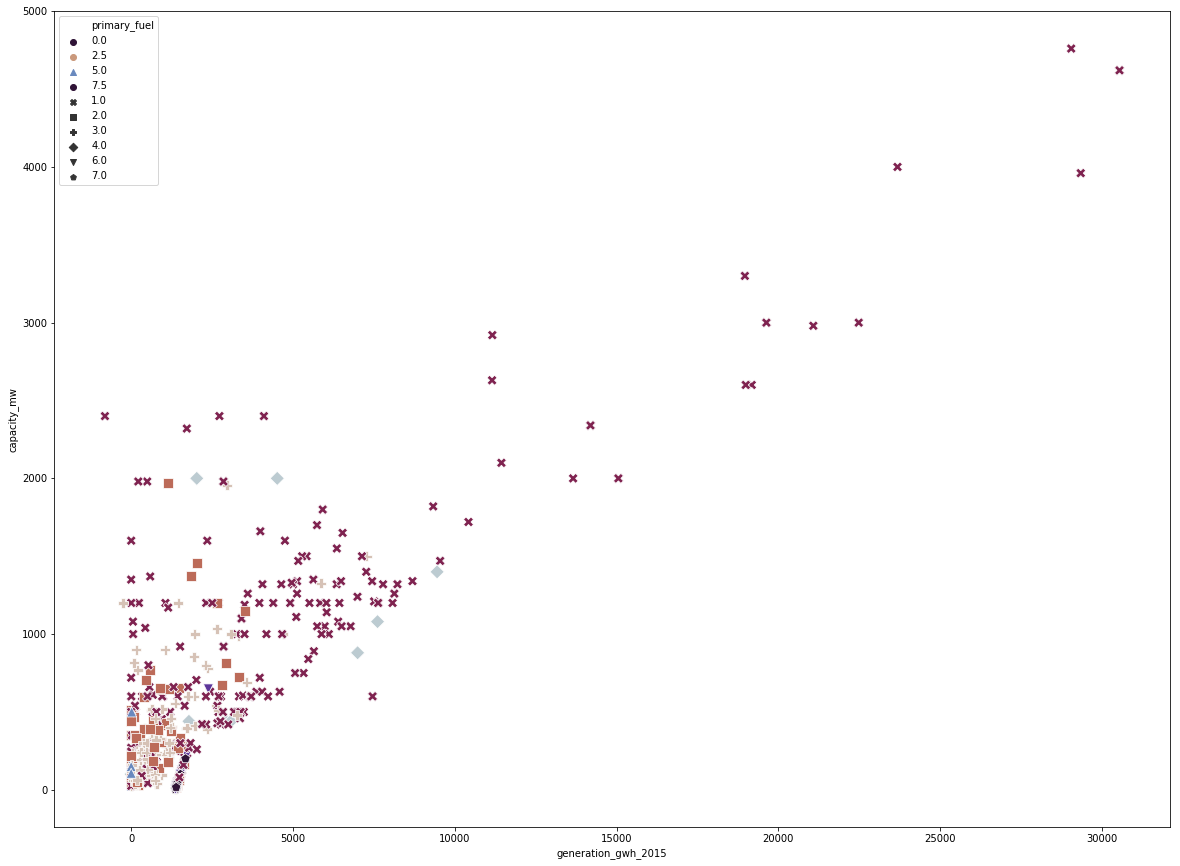

In [28]:
plt.figure(figsize = (20,15))
sns.scatterplot(y = 'capacity_mw',x = 'generation_gwh_2015', data = data, hue = 'primary_fuel', style='primary_fuel', palette='twilight_shifted_r', s =100 )

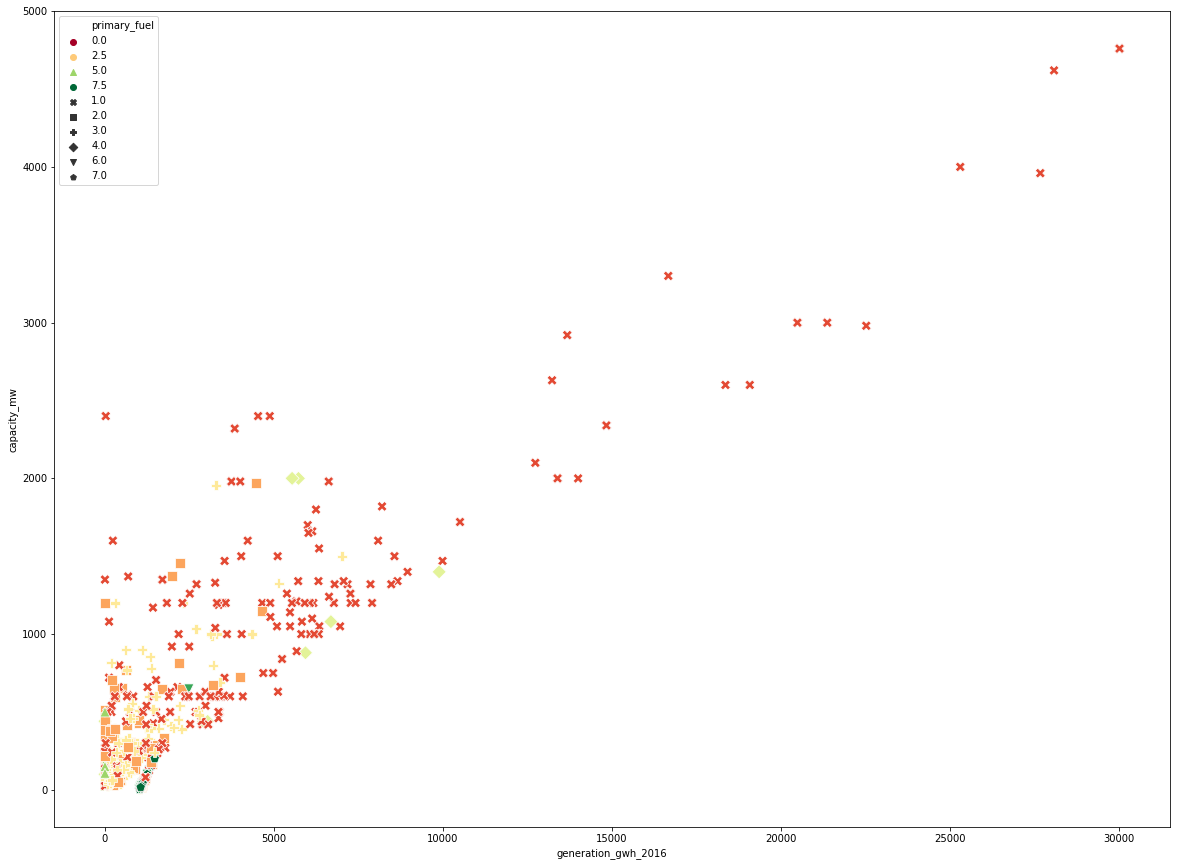

In [29]:
plt.figure(figsize = (20,15))
sns.scatterplot(y = 'capacity_mw',x = 'generation_gwh_2016', data = data, hue = 'primary_fuel', style='primary_fuel', palette='RdYlGn', s =100 )

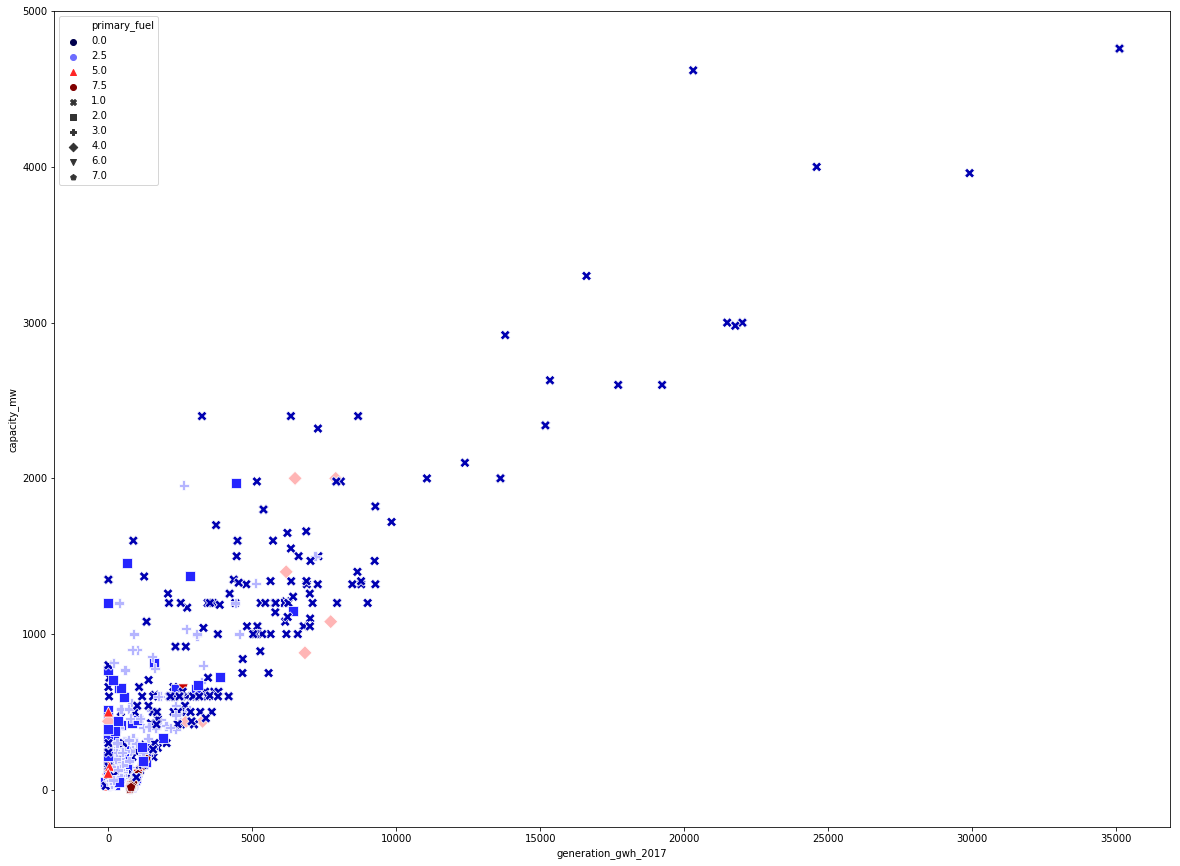

In [30]:
plt.figure(figsize = (20,15))
sns.scatterplot(y = 'capacity_mw',x = 'generation_gwh_2017', data = data, hue = 'primary_fuel', style='primary_fuel', palette='seismic', s =100 )

### Now i'm using binary encoder on the text data to convert them to binary data

In [31]:
from category_encoders import BinaryEncoder
be = BinaryEncoder()
data1 = be.fit_transform(data[['source','geolocation_source','generation_data_source']],return_df = True)

In [32]:
data1.head()

,source_0,source_1,source_2,source_3,source_4,source_5,source_6,source_7,source_8,geolocation_source_0,geolocation_source_1,geolocation_source_2,generation_data_source_0
0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,0,0,0,0,0,0,0,1,0,0,1,0,1
2,0,0,0,0,0,0,0,1,1,0,1,0,1
3,0,0,0,0,0,0,1,0,0,0,1,0,1
4,0,0,0,0,0,0,1,0,0,0,1,0,1


### I joined the encoded data to the original dataset and checking for the presence of null data

In [33]:
dataset = pd.concat([data,data1], axis = 1)
dataset.isnull().sum()

capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
commissioning_year          0
source                      0
geolocation_source          0
year_of_capacity_data       0
generation_gwh_2013         0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_data_source      0
source_0                    0
source_1                    0
source_2                    0
source_3                    0
source_4                    0
source_5                    0
source_6                    0
source_7                    0
source_8                    0
geolocation_source_0        0
geolocation_source_1        0
geolocation_source_2        0
generation_data_source_0    0
dtype: int64

### there are no null data available and dropping the text data which was encoded and joined in the earlier step

In [34]:
dataset = dataset.drop(columns = ['source','geolocation_source','generation_data_source','generation_data_source_0'])

### Checking for correlation coefficient of the features with the capacity.

In [35]:
corr_data = dataset.corr()
corr_data['capacity_mw'].sort_values(ascending = False)

capacity_mw              1.000000
generation_gwh_2017      0.883008
generation_gwh_2016      0.852329
generation_gwh_2015      0.795678
generation_gwh_2014      0.762016
generation_gwh_2013      0.685821
commissioning_year       0.346290
source_6                 0.313364
longitude                0.199549
latitude                 0.050392
geolocation_source_1     0.028869
source_1                -0.140658
source_2                -0.152713
source_3                -0.189853
source_4                -0.195419
source_5                -0.205100
geolocation_source_2    -0.205107
source_7                -0.306703
source_8                -0.309201
primary_fuel            -0.377783
year_of_capacity_data         NaN
source_0                      NaN
geolocation_source_0          NaN
Name: capacity_mw, dtype: float64

### here I can see that the features generation_gwh has highest correlation with the capacity and latitude and geolocation source has lowest correlation. We can also see that columns year_of_capacity_data, source_0 and geolocation_source_0 has no correlation at all because when we used binary encoder all the first column was turned to 0. Therefore these features can be dropped

### Like wise I'm checking correlation of other variables with the primary fuel

In [36]:
corr_data['primary_fuel'].sort_values(ascending = False)

primary_fuel             1.000000
source_8                 0.587826
source_7                 0.554181
geolocation_source_2     0.485067
source_3                 0.076486
source_5                 0.074281
source_2                 0.025219
latitude                -0.014217
source_1                -0.014966
source_4                -0.045768
geolocation_source_1    -0.081514
generation_gwh_2013     -0.150537
generation_gwh_2014     -0.182624
generation_gwh_2015     -0.199751
generation_gwh_2016     -0.235993
generation_gwh_2017     -0.264417
longitude               -0.351761
capacity_mw             -0.377783
source_6                -0.513087
commissioning_year      -0.668371
year_of_capacity_data         NaN
source_0                      NaN
geolocation_source_0          NaN
Name: primary_fuel, dtype: float64

### Here I can see the source columns show the highest positive correlation with the primary fuel use to generate electricity and the column commissioning_year has highest negative correlation with the primary fuel used. Which makes sense earlier we are too reliant on non-renewable energy sources like coal now we are shifting towards the renewable energy sources re

### Checking for multi-collinearity

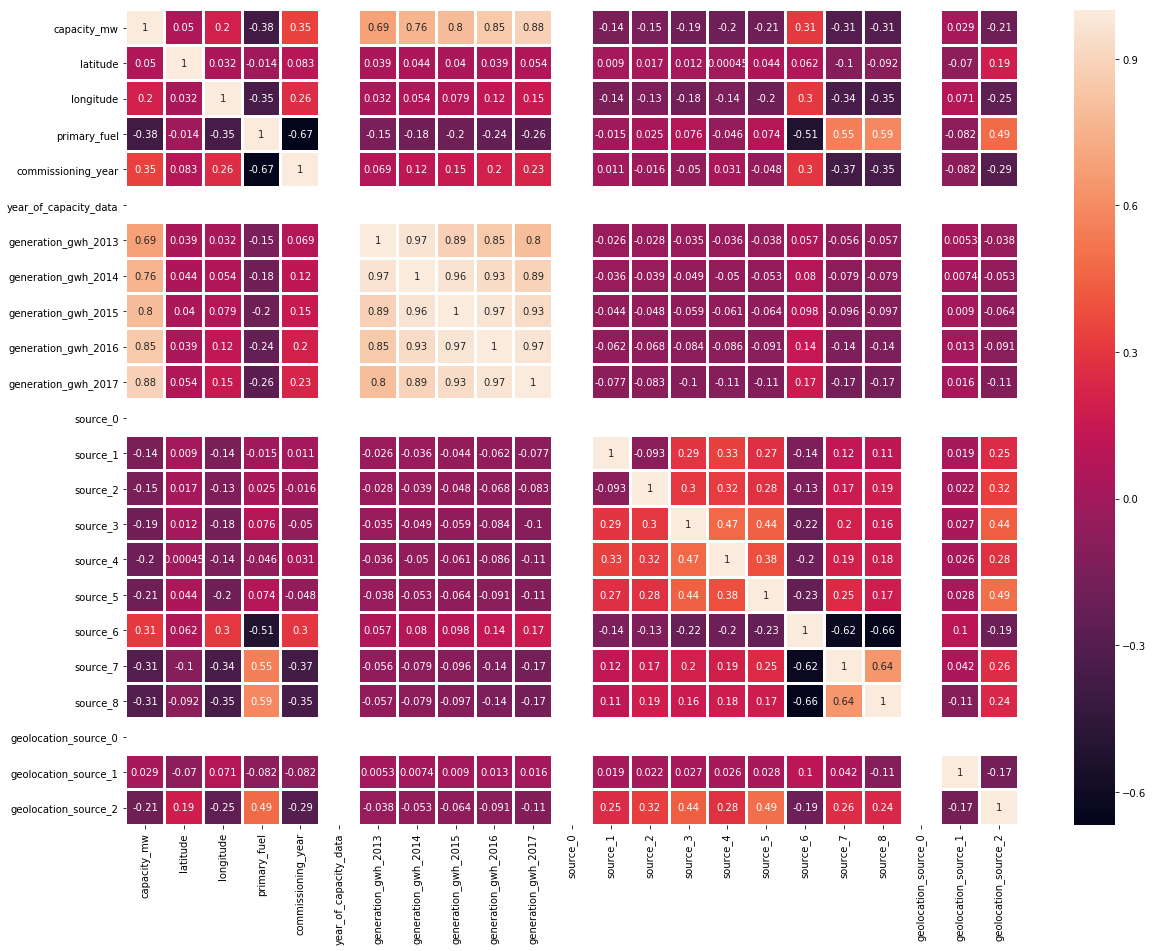

In [37]:
plt.figure(figsize = (20,15))
sns.heatmap(corr_data, annot  =True, linewidths=2)

### there is a slight multi-collenearity with the independent variables. However, since we are predicting, lets proceed with prediction first and we'll come back

### Checking the data distribution

In [38]:
dataset.iloc[:,:10].describe()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.0,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.189232,77.425406,3.205947,1992.403084,2018.0,1812.298486,1903.285077,1869.495373,1744.420211
std,580.221767,6.088198,4.782362,2.281339,16.521159,0.0,2535.540155,2719.307703,2920.076642,2965.039213
min,0.000000,8.168900,68.644700,0.000000,1927.000000,2018.0,-3295.717124,0.000000,-810.513029,0.000000
25%,16.837500,17.057825,74.390250,1.000000,1979.000000,2018.0,755.575179,823.275650,693.625285,707.024612
50%,60.000000,21.292250,76.912258,3.000000,1995.000000,2018.0,1563.650679,1529.981308,1382.974444,1053.101598
75%,388.125000,25.183775,79.211600,6.000000,2008.000000,2018.0,1592.428771,1577.594841,1444.016573,1213.338313
max,4760.000000,34.649000,95.408000,7.000000,2018.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000


In [39]:
dataset.iloc[:,10:].describe()

,generation_gwh_2017,source_0,source_1,source_2,source_3,source_4,source_5,source_6,source_7,source_8,geolocation_source_0,geolocation_source_1,geolocation_source_2
count,908.000000,908.0,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.0,908.000000,908.000000
mean,1661.713847,0.0,0.075991,0.094714,0.145374,0.136564,0.153084,0.710352,0.287445,0.284141,0.0,0.995595,0.135463
std,3053.182364,0.0,0.265130,0.292980,0.352672,0.343576,0.360267,0.453849,0.452820,0.451253,0.0,0.066262,0.342406
min,-120.366002,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,742.830104,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000
50%,787.978082,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000
75%,1031.445190,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.0,1.000000,0.000000
max,35116.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


### From the above two describe methods, I can see that the continuous data columns like generation_gwh(2013-17) has higher statndard deviation and its more than mean of the respective features. There is a issue with the data distributoin

### As per the previous analysis, i'm dropping the columns with no relationship with both the target variables

In [40]:
dataset = dataset.drop(columns = ['year_of_capacity_data','source_0','geolocation_source_0'])

### Checking for outliers

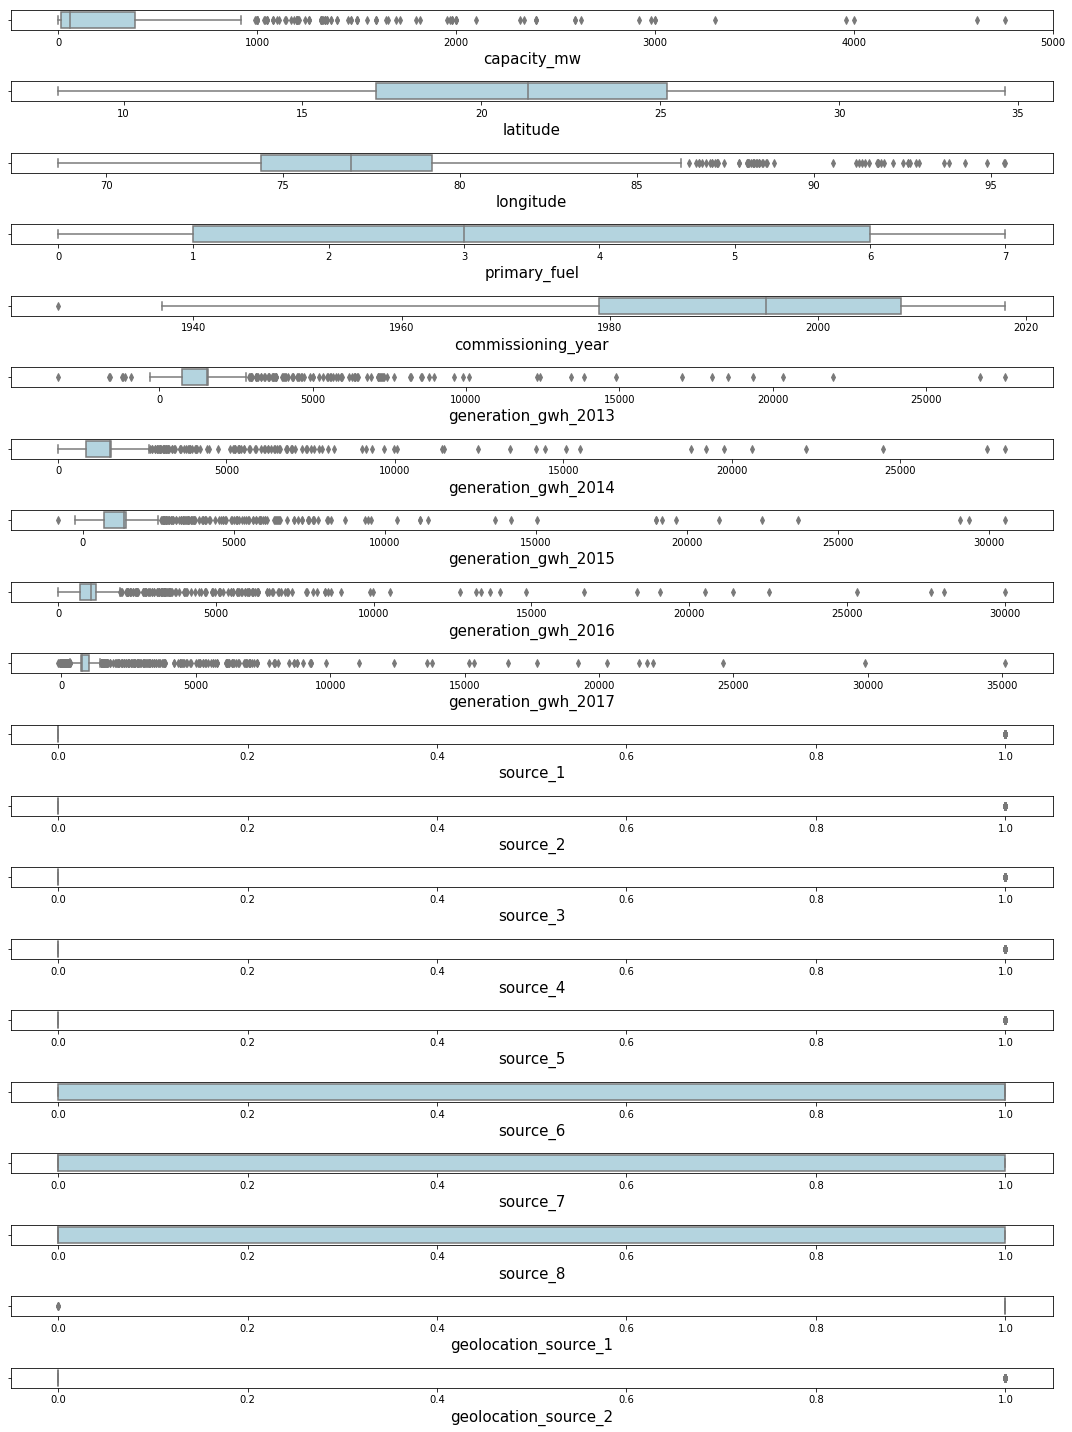

In [41]:
plt.figure(figsize= (15,20))
pltnum = 1
for i in dataset:
    if pltnum <=20:
        plt.subplot(20,1,pltnum)
        sns.boxplot(dataset[i],color = 'lightblue')
        plt.xlabel(i,fontsize=15)
    pltnum+=1
plt.tight_layout()

### Here I can see that most of the continuous data columns has a lot of outliers hence I'm using the zscore method to remove as much as the outliers possible

In [42]:
z = np.abs(zscore(dataset[['generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]))
z

array([[0.10048493, 0.14083634, 0.17182865, 0.24281333, 0.29971388],
       [0.07035961, 0.0986137 , 0.12031453, 0.17001805, 0.20985985],
       [0.08890798, 0.12461047, 0.15203212, 0.21483859, 0.26518359],
       ...,
       [0.09322962, 0.13066754, 0.15942211, 0.22528148, 0.27807364],
       [0.07603768, 0.10657189, 0.130024  , 0.18373862, 0.22679569],
       [0.09606865, 0.13464663, 0.16427684, 0.23214177, 0.28654156]])

In [43]:
new_data = dataset[(z<1.5).all(axis = 1)]
print(dataset.shape)
print(new_data.shape)

(908, 20)
(830, 20)


### There is 8-9% data loss, hence I'm proceeding with the outlier removal

### Checking for data distribution for the continuous variables

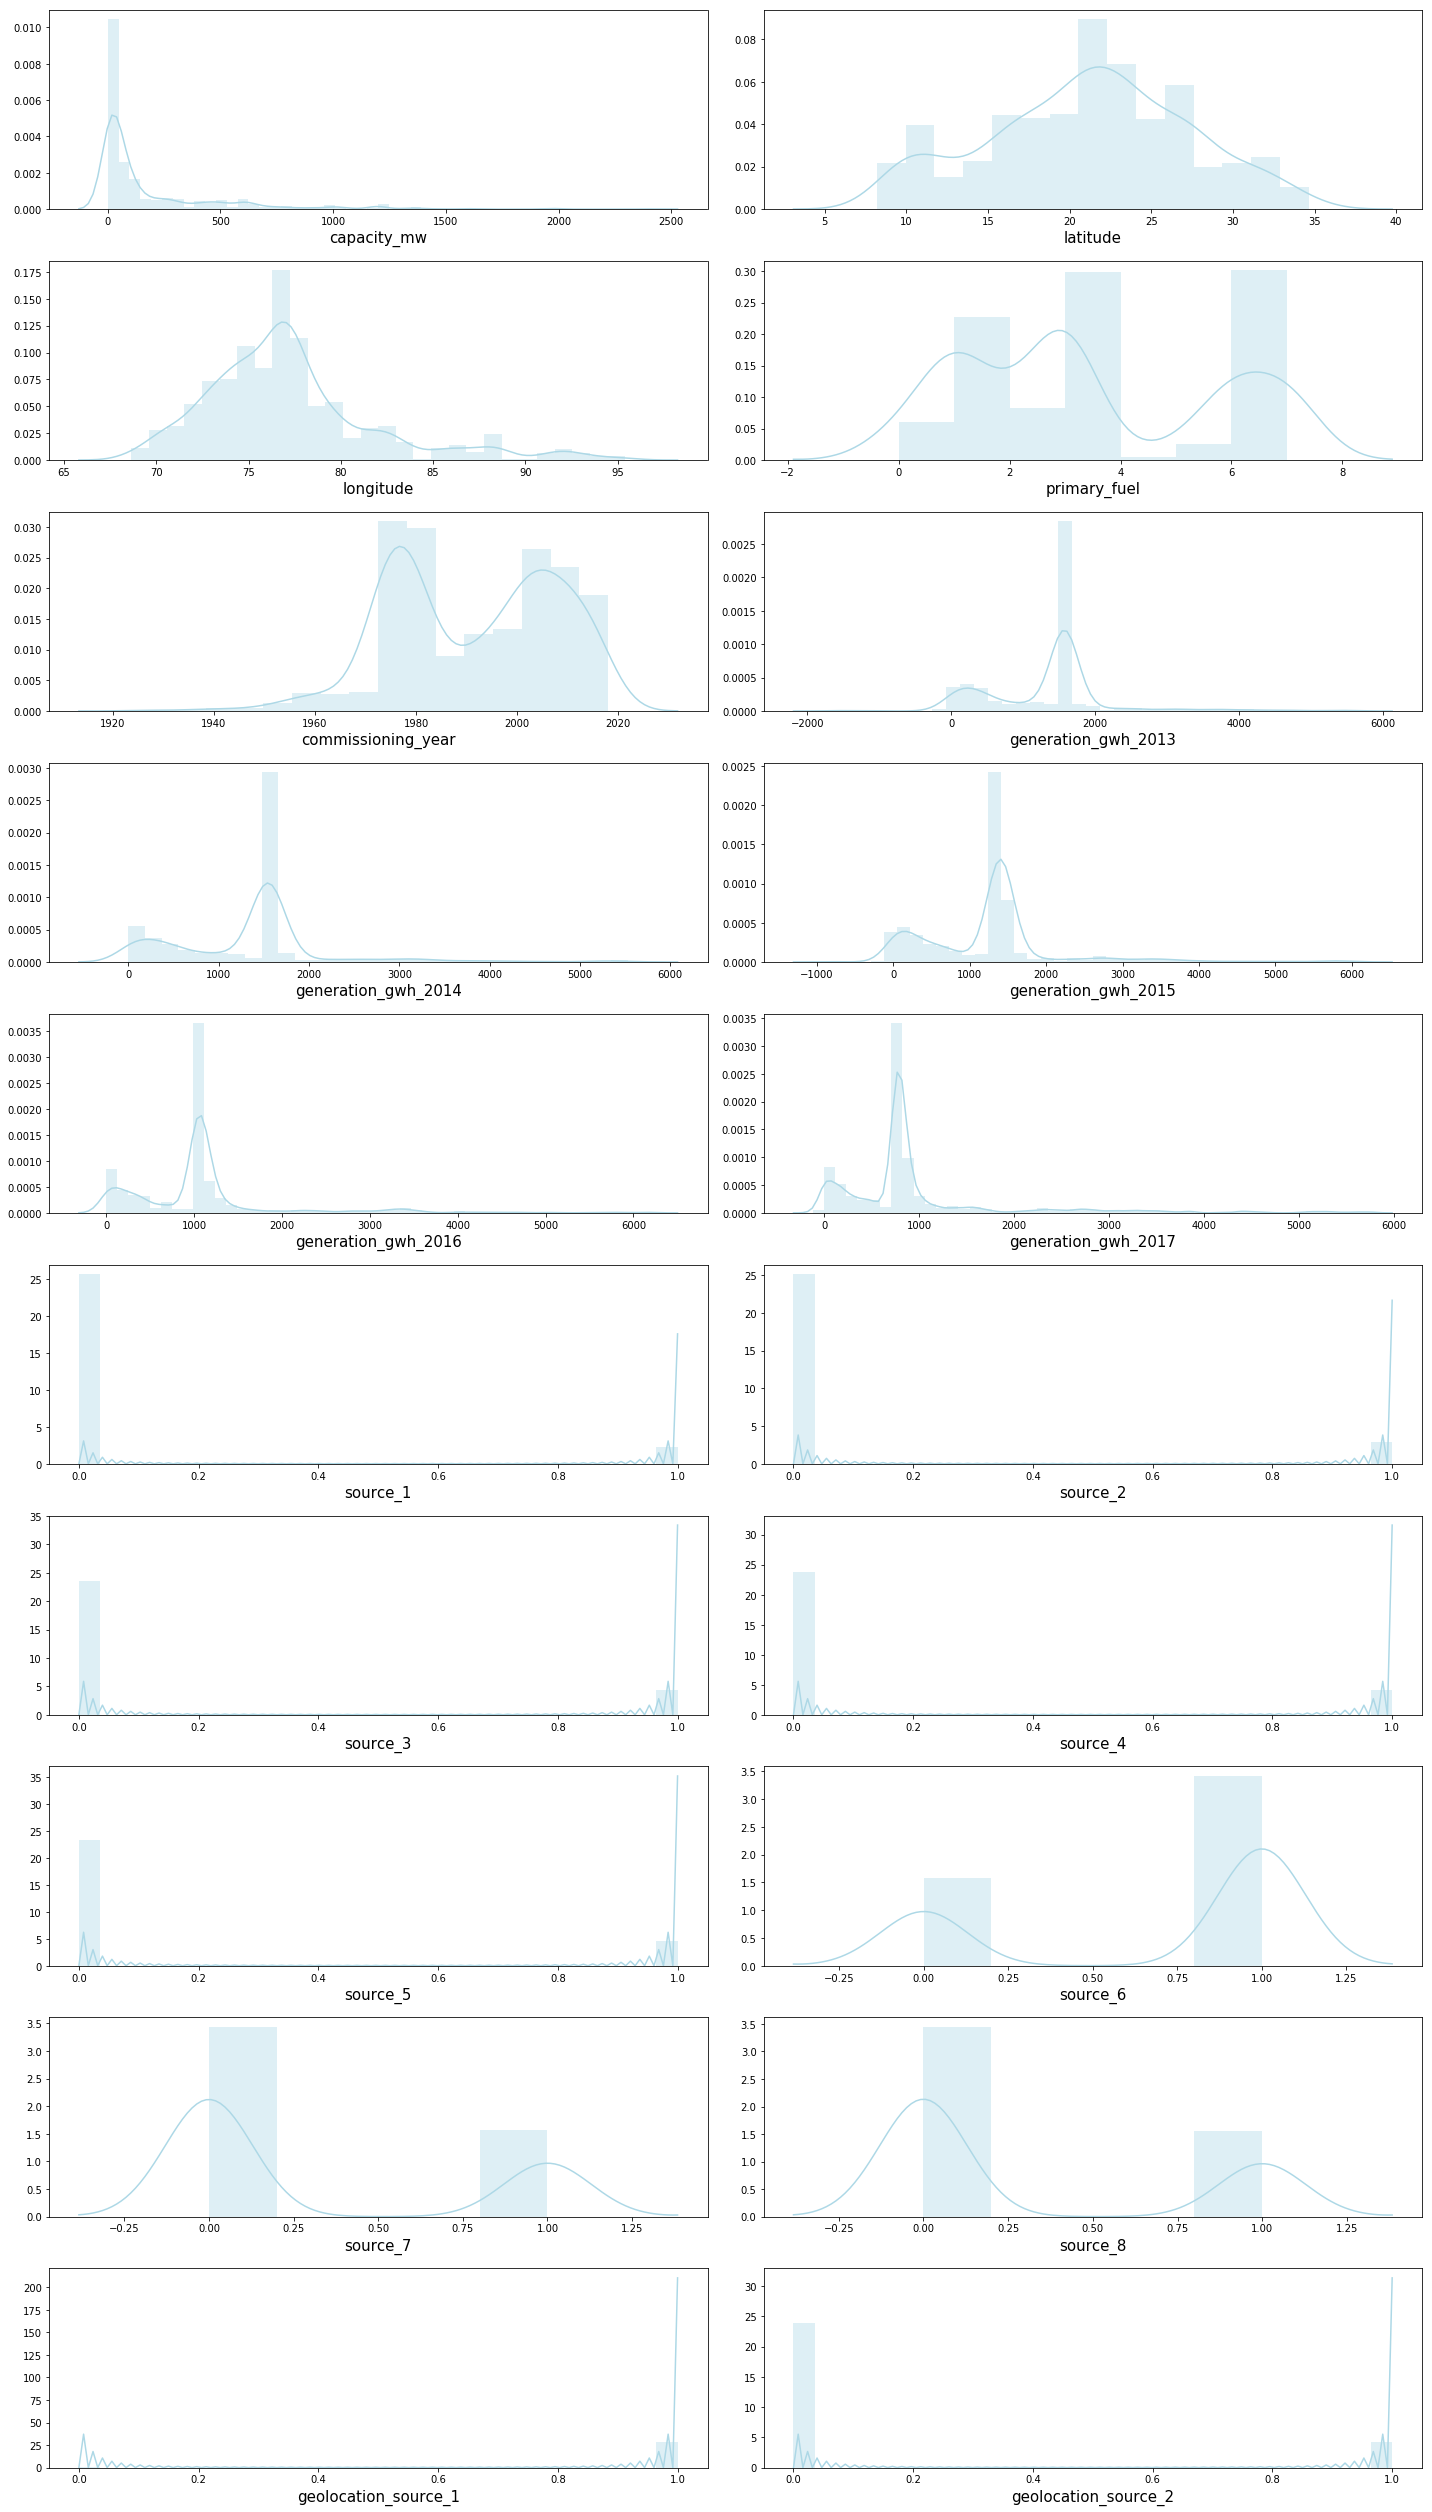

In [44]:
plt.figure(figsize= (20,35))
pltnum = 1
for i in new_data:
    if pltnum <=20:
        plt.subplot(10,2,pltnum)
        sns.distplot(new_data[i],color = 'lightblue')
        plt.xlabel(i,fontsize=15)
    pltnum+=1
plt.tight_layout()

### I can see there is a lot of skewness in the variables, therefore i'm removing them using the power transform method. Before I can remove them lets see the skewness

In [45]:
new_data.skew()

capacity_mw              2.727884
latitude                -0.112661
longitude                1.269355
primary_fuel             0.344240
commissioning_year      -0.263169
generation_gwh_2013      0.951730
generation_gwh_2014      1.217691
generation_gwh_2015      1.697391
generation_gwh_2016      2.359849
generation_gwh_2017      2.588312
source_1                 3.025347
source_2                 2.627497
source_3                 1.880443
source_4                 1.970588
source_5                 1.795987
source_6                -0.788661
source_7                 0.806721
source_8                 0.818856
geolocation_source_1   -14.326423
geolocation_source_2     1.983977
dtype: float64

### Splitting the data into x1 and y1 for capacity prediction model, similarly x2 and y2 for primary fuel prediction

In [46]:
x1 = new_data.drop(columns = ['capacity_mw'])
x2 = new_data.drop(columns = ['primary_fuel'])
y1 = new_data['capacity_mw']
y2 = new_data['primary_fuel']

### Scaling all the independent features of both the models

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x1 = pd.DataFrame(scaler.fit_transform(x1), columns =x1.columns)
x2 = pd.DataFrame(scaler.fit_transform(x2), columns =x2.columns)

### Using power transform on both the independent variables

In [48]:
tr = power_transform(x1,method = 'yeo-johnson')
x1 = pd.DataFrame(tr, columns = x1.columns)

tr2 = power_transform(x2,method = 'yeo-johnson')
x2 = pd.DataFrame(tr2, columns = x2.columns)

### I can see that post transformmation the skewness is under control

In [49]:
x1.skew()

latitude                 0.009431
longitude               -0.043303
primary_fuel             0.045291
commissioning_year      -0.072337
generation_gwh_2013      0.155459
generation_gwh_2014      0.161126
generation_gwh_2015      0.089710
generation_gwh_2016     -0.048146
generation_gwh_2017     -0.110834
source_1                 3.025347
source_2                 2.627497
source_3                 1.880443
source_4                 1.970588
source_5                 1.795987
source_6                -0.788661
source_7                 0.806721
source_8                 0.818856
geolocation_source_1   -14.326423
geolocation_source_2     1.983977
dtype: float64

In [50]:
x2.skew()

capacity_mw              0.676388
latitude                 0.009431
longitude               -0.043303
commissioning_year      -0.072337
generation_gwh_2013      0.155459
generation_gwh_2014      0.161126
generation_gwh_2015      0.089710
generation_gwh_2016     -0.048146
generation_gwh_2017     -0.110834
source_1                 3.025347
source_2                 2.627497
source_3                 1.880443
source_4                 1.970588
source_5                 1.795987
source_6                -0.788661
source_7                 0.806721
source_8                 0.818856
geolocation_source_1   -14.326423
geolocation_source_2     1.983977
dtype: float64

## I can see that the outliers are still present. however we have removed them upto large extent

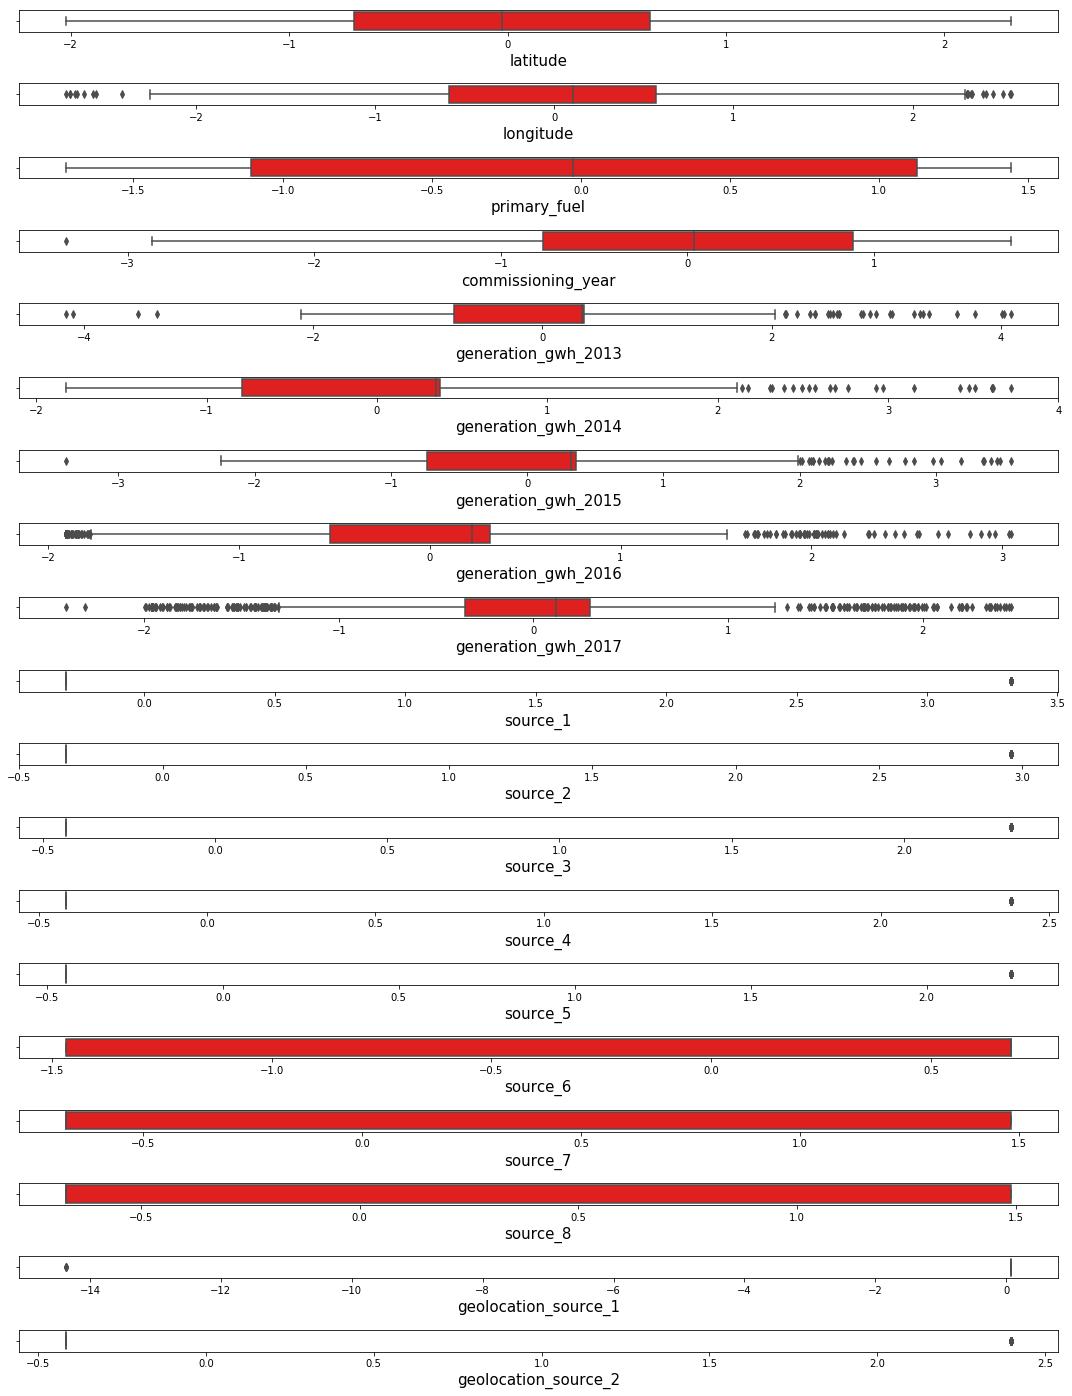

In [51]:
plt.figure(figsize= (15,20))
pltnum = 1
for i in x1:
    if pltnum <=20:
        plt.subplot(20,1,pltnum)
        sns.boxplot(x1[i],color = 'red')
        plt.xlabel(i,fontsize=15)
    pltnum+=1
plt.tight_layout()

### Samw with x2 data as well, the outliers have been reduced to greater extent

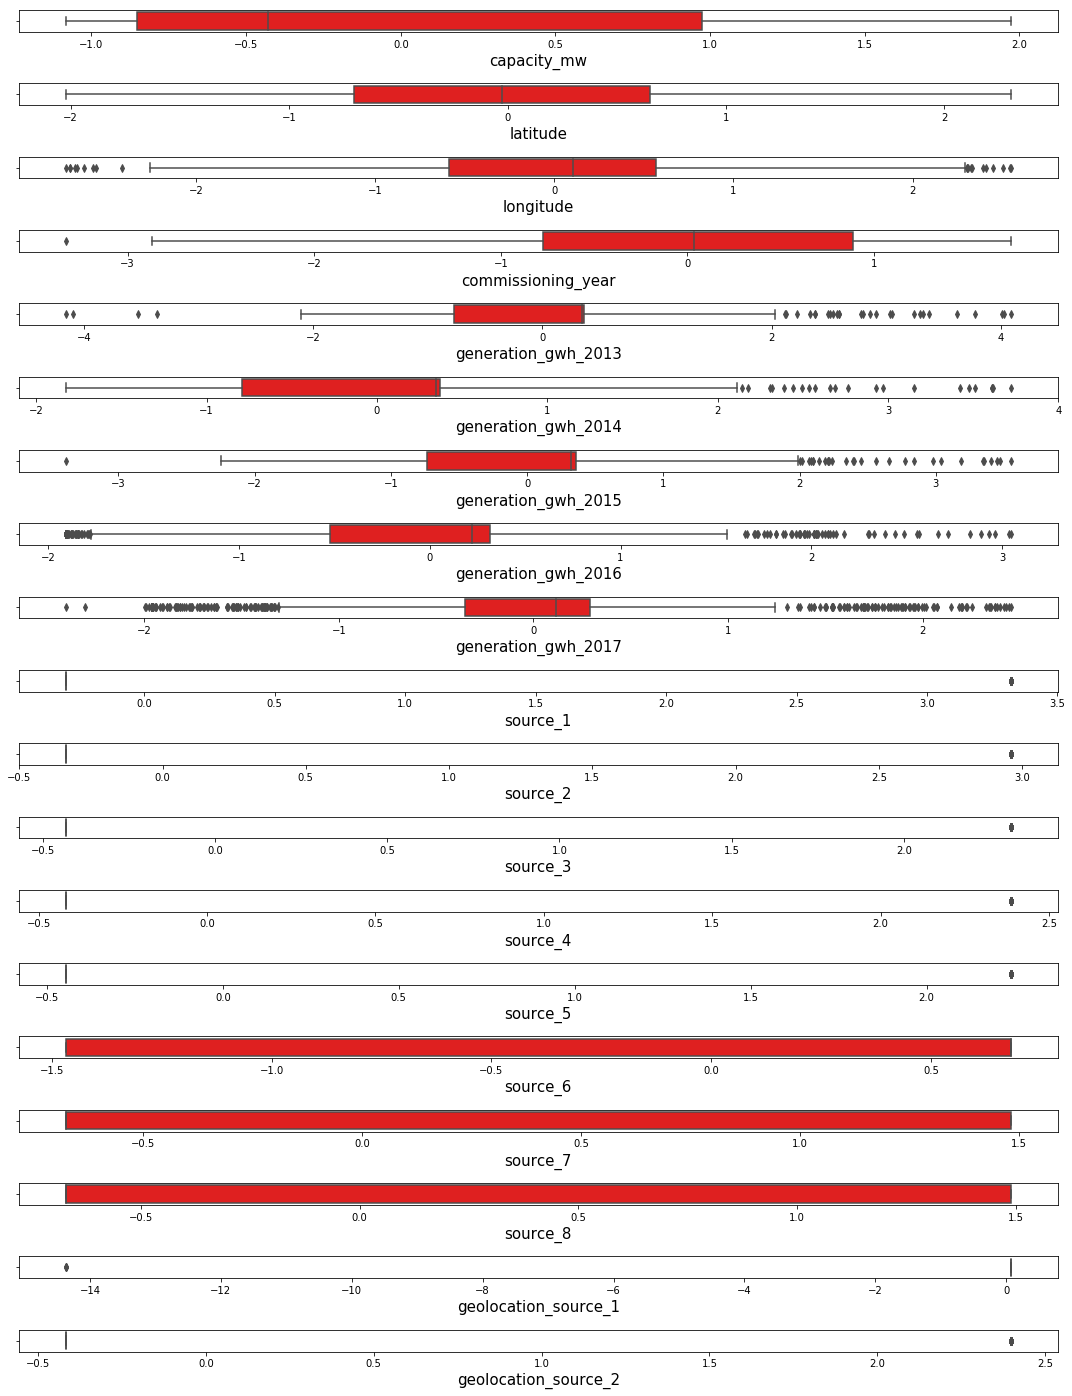

In [52]:
plt.figure(figsize= (15,20))
pltnum = 1
for i in x2:
    if pltnum <=20:
        plt.subplot(20,1,pltnum)
        sns.boxplot(x2[i],color = 'red')
        plt.xlabel(i,fontsize=15)
    pltnum+=1
plt.tight_layout()

### Checking for data distribution, we were able to remove skewness upto acceptable limit. however due to presence of lots of null data, we couldn't control skewness/outliers any further. And even if we did we will be losing more data which is not advisable. 

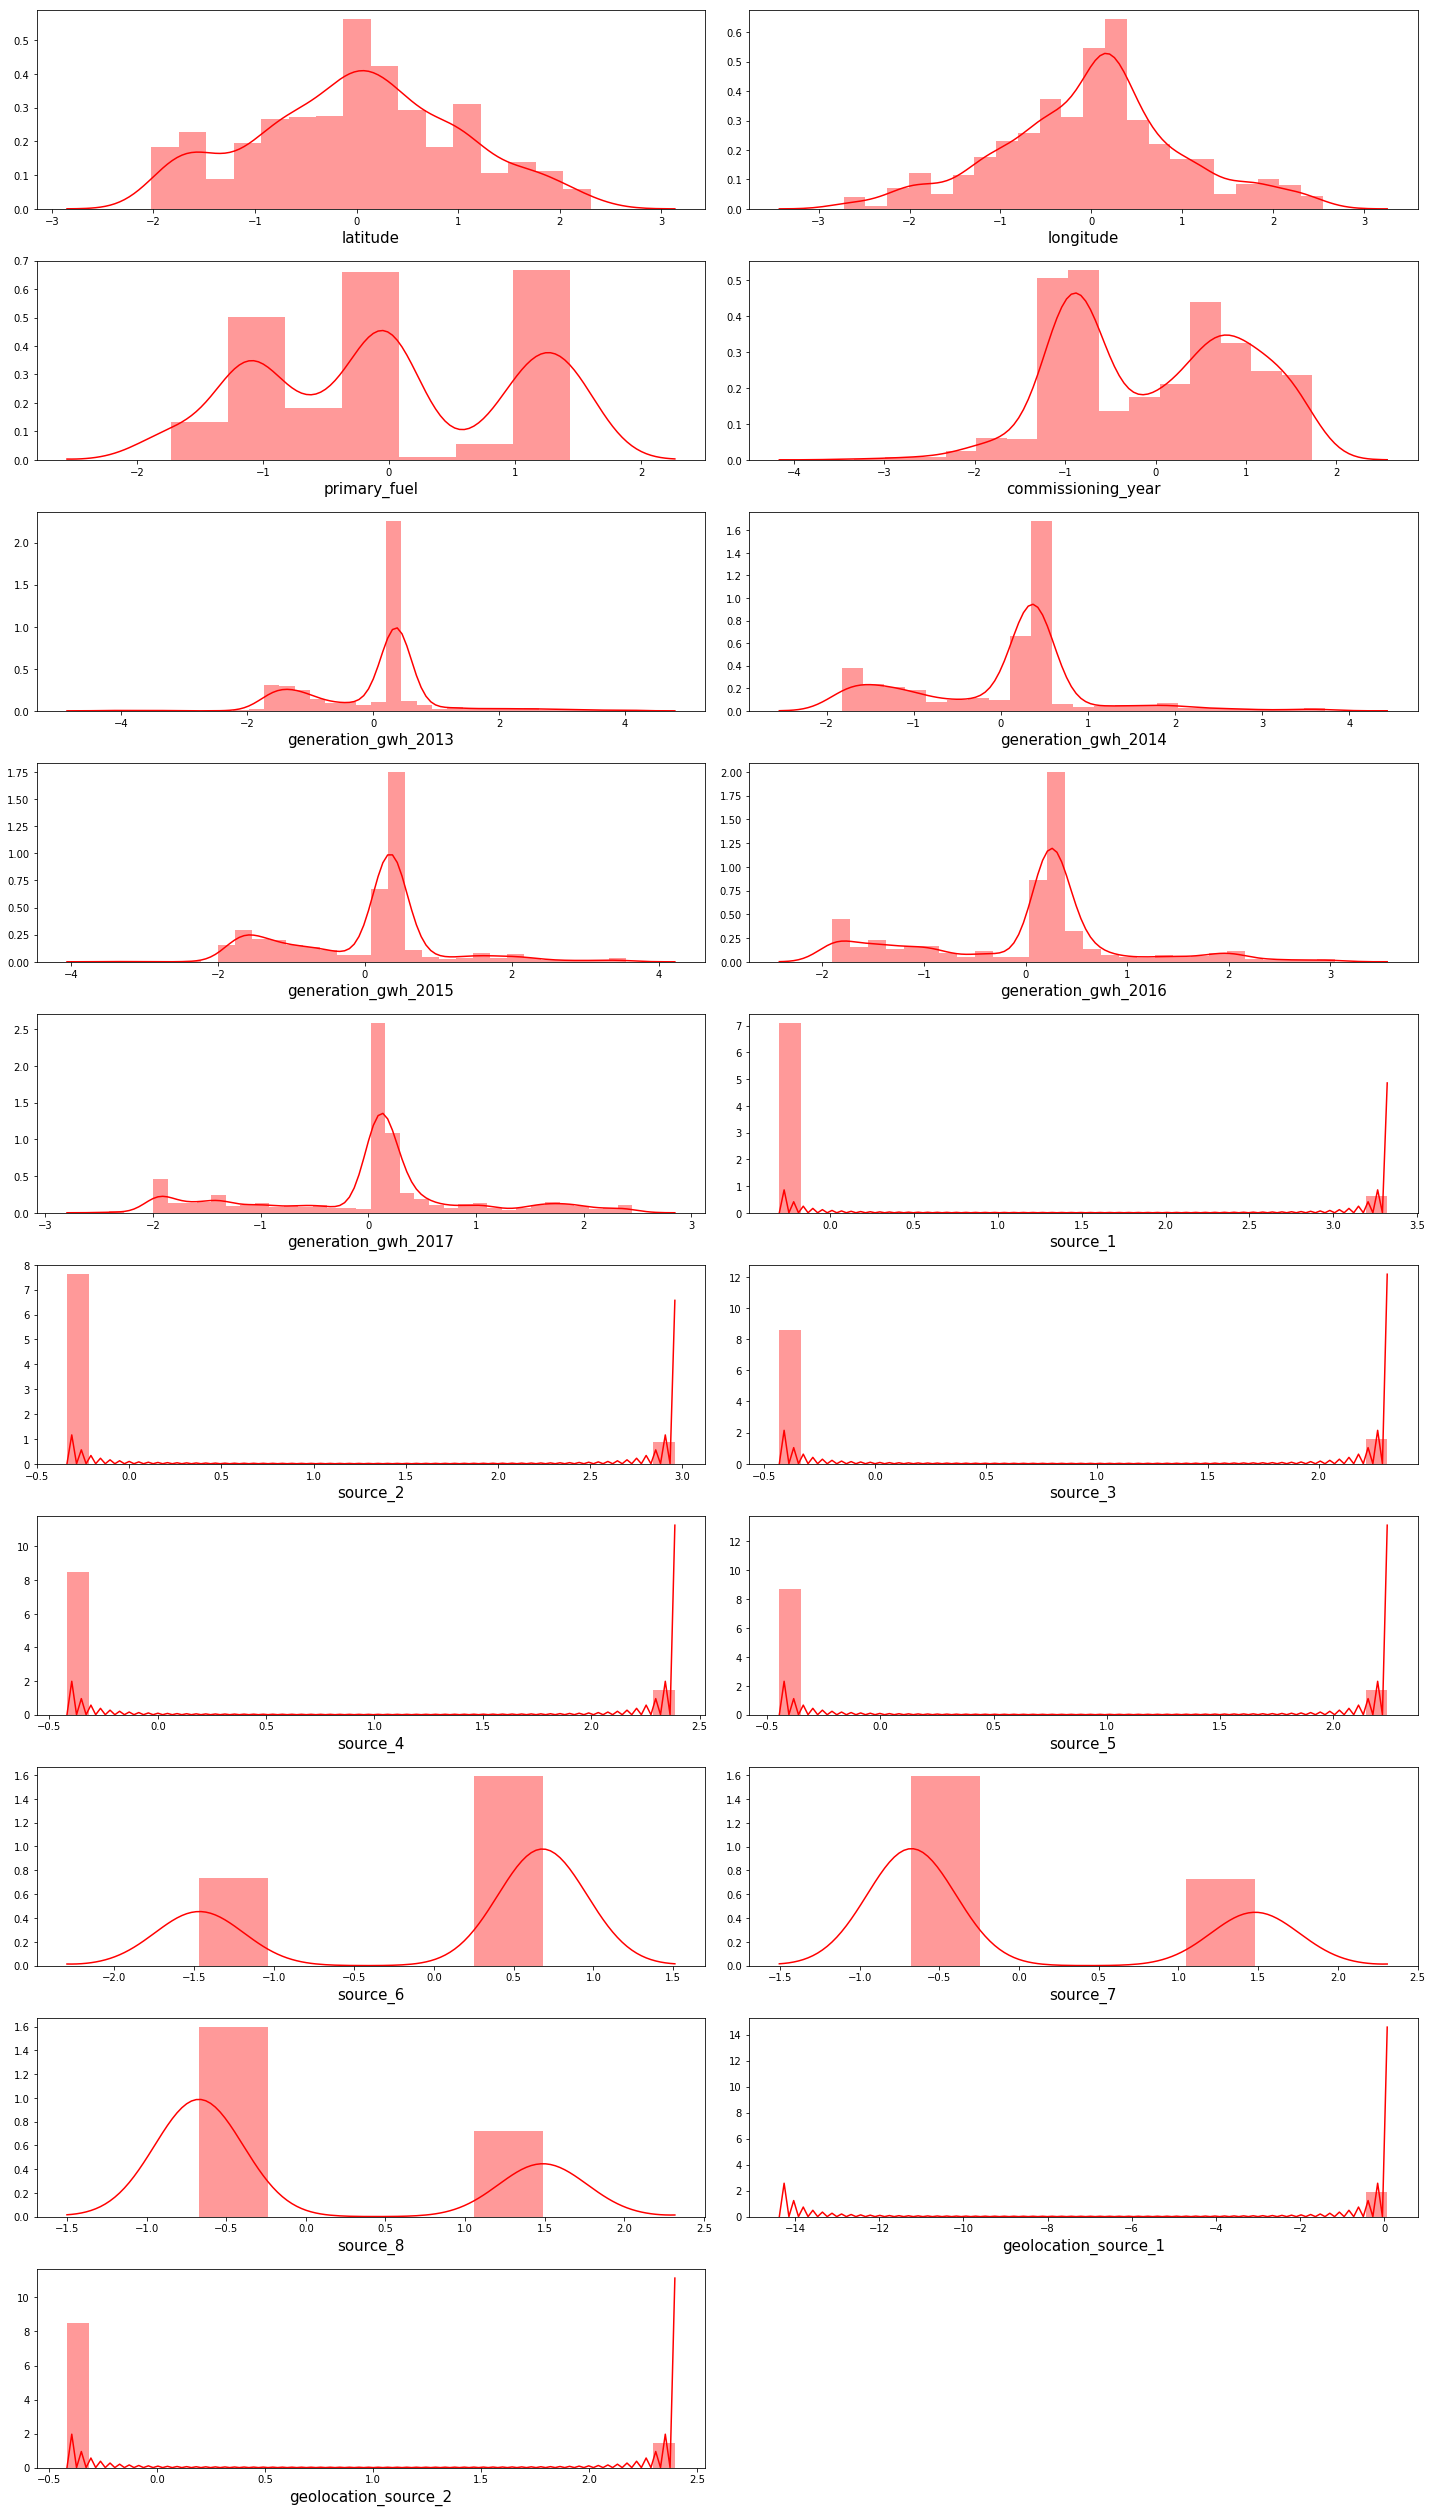

In [53]:
plt.figure(figsize= (20,35))
pltnum = 1
for i in x1:
    if pltnum <=20:
        plt.subplot(10,2,pltnum)
        sns.distplot(x1[i],color = 'red')
        plt.xlabel(i,fontsize=15)
    pltnum+=1
plt.tight_layout()

### Same with the x2 data

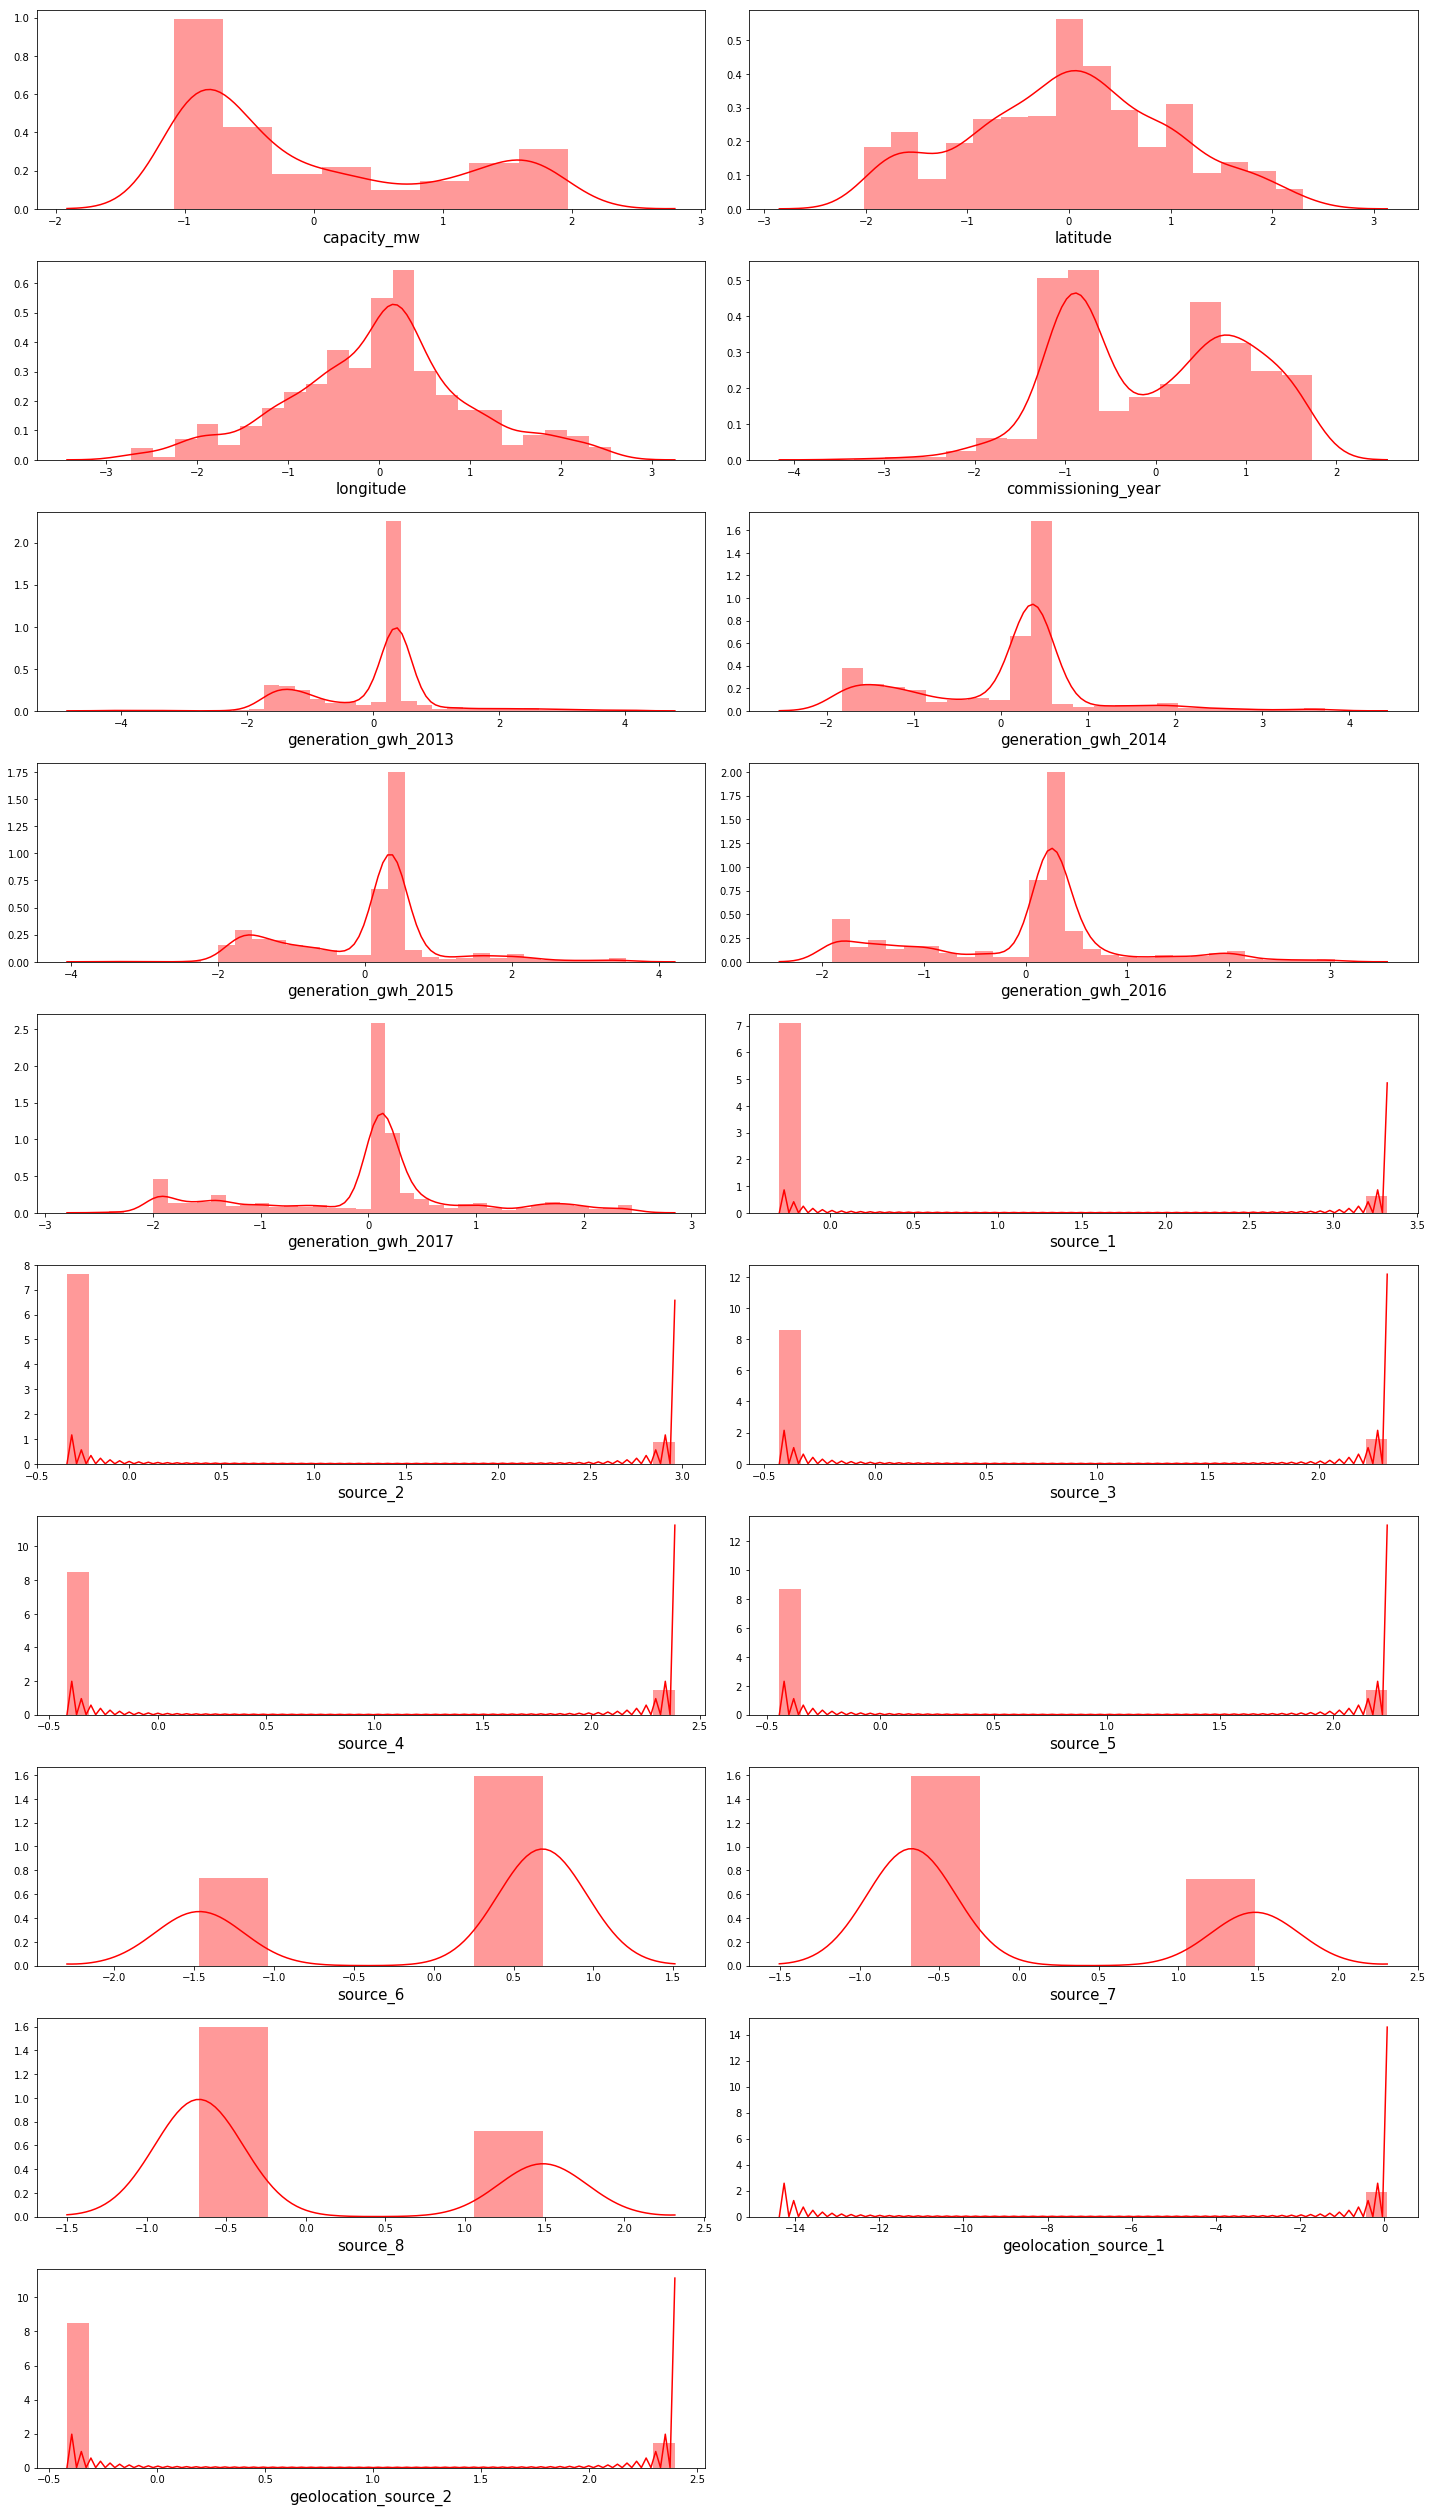

In [54]:
plt.figure(figsize= (20,35))
pltnum = 1
for i in x2:
    if pltnum <=20:
        plt.subplot(10,2,pltnum)
        sns.distplot(x2[i],color = 'red')
        plt.xlabel(i,fontsize=15)
    pltnum+=1
plt.tight_layout()

## 1. Prediction of Fuel Type

### Checking for class imbalance

In [55]:
y2.value_counts()

3.0    248
1.0    189
6.0    127
7.0    123
2.0     68
0.0     50
5.0     21
4.0      4
Name: primary_fuel, dtype: int64

### Addressing the class imbalance using SMOTE with n_neighbors 3 because the class 4.0 has only 4 values

In [56]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(k_neighbors=3)
x_over, y_over = sm.fit_resample(x2,y2)

### Finding the best random state

In [57]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression
rs = 0
for i in range(0,3000):
    x_train,x_test, y_train,y_test = train_test_split(x_over,y_over,test_size = 0.3, random_state = i)
    lg = LogisticRegression(multi_class = 'multinomial')
    lg.fit(x_train,y_train)
    ts_pred = lg.predict(x_test)
    tr_pred = lg.predict(x_train)
    ts_score = accuracy_score(y_test,ts_pred)
    tr_score = accuracy_score(y_train, tr_pred)
    if round(ts_score*100,1) == round(tr_score*100,1):
        if i>rs:
            rs = i
print('the best random state for the data set is', rs)

the best random state for the data set is 2981


### We found the best random state. Therefore, splitting the data with same random state

In [58]:
x_train,x_test,y_train,y_test = train_test_split(x_over,y_over, test_size = 0.3, random_state = rs)

### Model 1: Logistic Regression

In [59]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
lg_pred = lg.predict(x_test)
lg_score = accuracy_score(y_test,lg_pred)
print('The Accuracy score for the Logistic Regression is' , lg_score)

The Accuracy score for the Logistic Regression is 0.8104026845637584


### Model 2: Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
rf_pred =rf.predict(x_test)
rf_score = accuracy_score(y_test,rf_pred)
print('The Accuracy score for the Random Forest Classifier is' , rf_score)

The Accuracy score for the Random Forest Classifier is 0.9513422818791947


### Model 3: Extra Trees Classifier

In [61]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(x_train,y_train)
et_pred = et.predict(x_test)
et_score = accuracy_score(y_test,et_pred)
print('The Accuracy score for the Extra Trees Classifier is' , et_score)

The Accuracy score for the Extra Trees Classifier is 0.9664429530201343


### Model 4: XGB Classifier

In [62]:
from xgboost import XGBClassifier
xgb = XGBClassifier(eval_metric = 'logloss')
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)
xgb_score = accuracy_score(y_test,xgb_pred)
print('The Accuracy score for the XG Boost Classifier is' , xgb_score)

The Accuracy score for the XG Boost Classifier is 0.9530201342281879


### Checking for overfitting model using cross_val_score

In [63]:
cv = cross_val_score(lg,x_over,y_over, cv =7)
cv = cv.mean()
cv

0.8069743549637044

In [64]:
cv1 = cross_val_score(rf,x_over,y_over, cv =7)
cv1 = cv1.mean()
cv1

0.9601922488997588

In [65]:
cv2 = cross_val_score(et,x_over,y_over, cv =7)
cv2 = cv2.mean()
cv2

0.9647282991233619

In [66]:
cv3 = cross_val_score(xgb,x_over,y_over, cv =7)
cv3 = cv3.mean()
cv3

0.9622025438852193

### Selecting the best model for the multi-class prediction

In [67]:
mod = [lg_score,rf_score,et_score,xgb_score]
cv  = [cv,cv1,cv2,cv3]
model = pd.DataFrame({})
model['mod'] = mod
model['cv'] = cv
model['diff'] = model['mod'] - model['cv']
model

,mod,cv,diff
0,0.810403,0.806974,0.003428
1,0.951342,0.960192,-0.008850
2,0.966443,0.964728,0.001715
3,0.953020,0.962203,-0.009182


### The Best Model is Extra Trees Classifier.Therefore proceeding with hyper parameter tuning to improve score

## Hyper Parameter Tuniing

In [68]:
params = {'n_estimators':[100,150,200,250,300],
         'criterion':['gini','entropy'],
         'max_depth':[10,12,14,16],
         'min_samples_split':[3,5,7,9],
         'bootstrap':[True,False],
         'n_jobs':[-1]}

In [69]:
gcv = GridSearchCV(ExtraTreesClassifier(),params, cv =5, n_jobs =-1)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 14, 16],
                         'min_samples_split': [3, 5, 7, 9],
                         'n_estimators': [100, 150, 200, 250, 300],
                         'n_jobs': [-1]})

### Getting the best parameters

In [70]:
gcv.best_params_

{'bootstrap': False,
 'criterion': 'gini',
 'max_depth': 16,
 'min_samples_split': 3,
 'n_estimators': 250,
 'n_jobs': -1}

### Fitting the best model to the dataset and predicting the test data.

In [71]:
fnl_mod = ExtraTreesClassifier(bootstrap = False,criterion = 'entropy',max_depth = 16,
                              min_samples_split = 3, n_estimators = 200, n_jobs = -1)
fnl_mod.fit(x_train,y_train)
fnl_pred = fnl_mod.predict(x_test)
fnl_score = accuracy_score(y_test,fnl_pred)
print('The Accuracy score for the Tuned Extra Trees Classifier is' , fnl_score)

The Accuracy score for the Tuned Extra Trees Classifier is 0.959731543624161


### Classification report for the same. I can see that the model has achieved good f1-score

In [72]:
print(classification_report(y_test,fnl_pred))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99        76
         1.0       0.88      0.88      0.88        66
         2.0       0.97      0.86      0.91        83
         3.0       0.90      0.95      0.93        65
         4.0       0.98      1.00      0.99        87
         5.0       0.96      0.99      0.97        73
         6.0       1.00      1.00      1.00        80
         7.0       1.00      1.00      1.00        66

    accuracy                           0.96       596
   macro avg       0.96      0.96      0.96       596
weighted avg       0.96      0.96      0.96       596



### Checking the Receiver Operator Chaacteristics Score for the classes using the scikitplot module

In [73]:
import scikitplot as skplt

<Figure size 2160x1440 with 0 Axes>

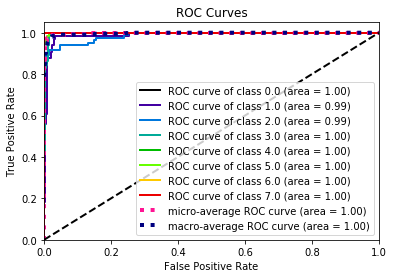

In [74]:
prob = fnl_mod.predict_proba(x_test)
plt.figure(figsize = (30,20))
skplt.metrics.plot_roc(y_test,prob)
plt.show()

## the model has given me good results, hence saving the model

In [75]:
import joblib
joblib.dump(fnl_mod,'Fuel_type_Power_plant.pkl')

['Fuel_type_Power_plant.pkl']

# let's predict the capacity now

### I'm dropping the latitude and geolocation_source_1 column to achieve better results in the regression problem, because these features has very less correlation with the target capacity_mw

In [76]:
"""
latitude                 0.050392
geolocation_source_1     0.028869
"""

'\nlatitude                 0.050392\ngeolocation_source_1     0.028869\n'

In [77]:
x1 = x1.drop(columns = ['geolocation_source_1','latitude'])

### Finding the best Random State

In [78]:
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
rs = 0
for i in range(0,2000):
    x_train,x_test,y_train,y_test = train_test_split(x1,y1,random_state = i, test_size = 0.3)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    tr_score = lr.score(x_train,y_train)
    ts_score = lr.score(x_test,y_test)
    if round(tr_score*100,1) == round(ts_score*100,1):
        if i> rs:
            rs = i
print('the best random state is', rs)

the best random state is 1946


### Splitting the data after finding the best random state

In [79]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size = 0.3,random_state =rs)

### Model 1: Linear Regression

In [80]:
lin = LinearRegression()
lin.fit(x_train,y_train)
lin_pred = lin.predict(x_test)
lin_score = lin.score(x_test,y_test)
print('The r2 for the Linear Regression is' , lin_score)

The r2 for the Linear Regression is 0.4805802977912291


In [81]:
from sklearn.metrics import mean_squared_error

In [82]:
lin_rmse = np.sqrt(mean_squared_error(y_test,lin_pred))
print('RMSE for Linear Regression: ', lin_rmse)

RMSE for Linear Regression:  224.4802455295036


### Model 2: Random Forest Regressor

In [83]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred = rfr.predict(x_test)
rfr_score = rfr.score(x_test,y_test)
print('The r2 for the Random Forest Regression is' , rfr_score)

The r2 for the Random Forest Regression is 0.6895093400502716


In [84]:
rfr_rmse = np.sqrt(mean_squared_error(y_test,rfr_pred))
print('RMSE for Random Forest Regression: ', rfr_rmse)

RMSE for Random Forest Regression:  173.5574215675492


### Model 3: Extra trees Regressor

In [85]:
from sklearn.ensemble import ExtraTreesRegressor
et = ExtraTreesRegressor()
et.fit(x_train,y_train)
et_pred = et.predict(x_test)
et_score = et.score(x_test,y_test)
print('The r2 for the Extra Trees Regression is' , et_score)

The r2 for the Extra Trees Regression is 0.7406763379366965


In [86]:
et_rmse = np.sqrt(mean_squared_error(y_test,et_pred))
print('RMSE for Random Forest Regression: ', et_rmse)

RMSE for Random Forest Regression:  158.61344292717973


### Model 4: XGB Regressor

In [87]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)
xgb_score = xgb.score(x_test,y_test)
print('The r2 for the XGB Regression is' , xgb_score)

The r2 for the XGB Regression is 0.6334689469575876


In [88]:
xgb_rmse = np.sqrt(mean_squared_error(y_test,xgb_pred))
print('RMSE for Random Forest Regression: ', xgb_rmse)

RMSE for Random Forest Regression:  188.57074051537478


### Bagging Regressor

In [89]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor()
br.fit(x_train,y_train)
br_pred = br.predict(x_test)
br_score = br.score(x_test,y_test)
print('The r2 for the Bagging Regression is' , br_score)

The r2 for the Bagging Regression is 0.6933852187086069


In [90]:
br_rmse = np.sqrt(mean_squared_error(y_test,br_pred))
print('RMSE for Random Forest Regression: ', br_rmse)

RMSE for Random Forest Regression:  172.47075439571998


### Checking for overfitting using the cross_val_score method

In [91]:
cv = cross_val_score(lin,x1,y1,scoring ='r2',cv = 7)
cv = cv.mean()
cv

0.3730050260060027

In [92]:
cv1 = cross_val_score(rfr,x1,y1,scoring ='r2',cv = 7)
cv1 = cv1.mean()
cv1

0.7025541978847613

In [93]:
cv2 = cross_val_score(et,x1,y1,scoring ='r2',cv = 7)
cv2 = cv2.mean()
cv2

0.7333959910101842

In [94]:
cv3 = cross_val_score(xgb,x1,y1,scoring ='r2',cv = 7)
cv3 = cv3.mean()
cv3

0.6715251834057974

In [95]:
cv4 = cross_val_score(br,x1,y1,scoring ='r2',cv = 7)
cv4 = cv4.mean()
cv4

0.6516992284222473

### Finding the best model

In [96]:
mod = [lin_score,rfr_score,et_score,xgb_score,br_score]
cv = [cv,cv1,cv2,cv3,cv4]
model = pd.DataFrame({})
model['mod'] = mod
model['cv'] = cv
model['best'] = model['mod'] - model['cv']
model

,mod,cv,best
0,0.480580,0.373005,0.107575
1,0.689509,0.702554,-0.013045
2,0.740676,0.733396,0.007280
3,0.633469,0.671525,-0.038056
4,0.693385,0.651699,0.041686


### I'm choosing the best model as Extra Trees Regressor, Hence performing the hyper parameter tuning for the same

## Hyper-Parameter Tuning

In [97]:
params = {'n_estimators':[100,150,200,250,300],
         'max_depth':[13,15,17,19],
         'min_samples_split':[3,5,7,9],
         'bootstrap':[True,False],
         'oob_score':[True,False]}

In [98]:
gcv = GridSearchCV(ExtraTreesRegressor(),params,cv = 5, n_jobs =-1)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [13, 15, 17, 19],
                         'min_samples_split': [3, 5, 7, 9],
                         'n_estimators': [100, 150, 200, 250, 300],
                         'oob_score': [True, False]})

### Finding the best parameters

In [99]:
gcv.best_params_

{'bootstrap': False,
 'max_depth': 19,
 'min_samples_split': 5,
 'n_estimators': 250,
 'oob_score': False}

## Fitting the best model and predicting te test data

In [100]:
fnl  = ExtraTreesRegressor(bootstrap = False, oob_score = False, max_depth = 15,min_samples_split = 5,n_estimators =300)
fnl.fit(x_train,y_train)
fnl_pred = fnl.predict(x_test)
fnl_score = fnl.score(x_test,y_test)
print('The r2 for the Tuned Extra Trees Regression is' , fnl_score)

The r2 for the Tuned Extra Trees Regression is 0.7296644712930813


In [101]:
fnl_rmse = np.sqrt(mean_squared_error(y_test,fnl_pred))
print('RMSE for Random Forest Regression: ', fnl_rmse)

RMSE for Random Forest Regression:  161.9460957786149


## Plotting the actual v/s predicted  test data

Text(0.5, 1.0, 'Actual v/s predicted')

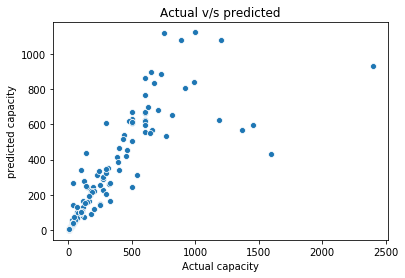

In [102]:
plt.figure()
sns.scatterplot(x = y_test,y = fnl_pred)
plt.xlabel('Actual capacity')
plt.ylabel('predicted capacity')
plt.title('Actual v/s predicted')

### Saving the model

In [103]:
joblib.dump(fnl,'capacity_powerplant.pkl')

['capacity_powerplant.pkl']